<a href="https://colab.research.google.com/github/HimathUragoda/Drone_delivery_optimisation/blob/main/(Task_3_4)_24WSA024_JNB_Python_Coursework_Final_2025S2(V5)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **24WSA024 Python Coursework Beta Version V5**

**Note - a final version will be released ready for you to start in week 3**

**24WSA024_Coursework_V5_1 - Main
**

# **Academic Integrity**

**Your coursework submission must be your own work**

Academic misconduct will not be tolerated. Students should be familiar with [regulation XVIII (academic misconduct)](https://www.lboro.ac.uk/governance/regulations/18/) also detailed in the relevant section in the [student handbook](https://www.lboro.ac.uk/students/handbook/assessments/exams-information/academic-misconduct/).

For coursework, students should be aware of misconduct section vii:

*collusion – working with another student on an assessment which is intended to be the student’s own work. This includes submitting assessed work as the student’s own of which the student is not the sole author (because of the collusion with another student), or providing material which is submitted by another student as their own.*


# **Student Details**

Please fill in the following variables in the code cell below

In [ ]:
#@title student details
coursework_on = False
# do not write above this line ##########################################
# provide text to assign the following variables to your names and id:

firstname  = 'Himath'
surname    = 'Uragoda'
student_id = 'F411966'
controller_name = 'xqcL'      # make a name up for the robot controller

# do not write below this line ##########################################

details = {'firstname': firstname, 'surname': surname, 'student_id': student_id }
for key, value in details.items():
  print (f"{key:<15} {value if value else 'not entered'}")
if any([not(v) for v in details.values()]) and coursework_on:
  raise Exception("PLEASE SUPPLY YOUR STUDENT DETAILS")


firstname       Himath
surname         Uragoda
student_id      F411966


**Coursework**

This Notebook contains your coursework. It contains details of the tasks to complete and submission details.

**Introduction**

A virtual environment , called the **Ecosystem** can be instantiated. Various types of automatable bots can instantiated in the ecosystem and instructed to collect and deliver objects from and to random locations. This objects are known as **pizzas**.

On the execution of this task bots expend energy, and can run out of power and become stranded. On the successful delivery of a pizza the bot accrues data on the number and weight of pizzas delivered.

To prevent bots running out of power you can build a charging station. By charging bots can carry on delivering pizzas, ad infinitum, in theory - there are some gotchas on the way.

**Your Deliverables**

There are **four** main deliverables for this coursework as follows:

1. A User Test
2. Documentation Exercise
3. Data Analytics
4. Performance Improvement

These are further defined and explained in the specific corresponding coursework releases along with the marking criteria. Please ensure you follow the explicit instructions, and where directed ensure specific variable, function or object names and named/titled code cells are used.


###**Intended Learning Outcomes**

This coursework is designed to reinforce of materials in the Basic Python Programming Course and give you opportunity to extend your knowledge.

The task will encourage you to understand, interact with and add code elements to an existing piece of software.

Extending knowledge of Python and programming is encouraged in these three key areas which are exteneded topics.

* Data analytics - visualising data by tabulation and/or using matplotlib
* Object orientation principles
* Processing dictionaries and lists by either
  * Conventional methods using for loop
  * Advanced methods using list comprehensions
* Solving complex problems by applying code solutions



####**Marking Schema**

Marks for each section is given below. A more detailed breakdown is given in the associated sections below.

|section|Description|Marks|
|---|---|---|
|**Version Control**|Use of Git/Github|**15**|
|**Documentation for Bots**|Documention of Bots classes|**20**|
|**Data Analytics**|Tabular and Graphical Outputs|**30**|
|**Performance Optimisation**|Improving the KPIs|**35**|



###**How to Start**

It is important to approach this piece of work methodically. A key learning outcome is to understand and then use, and develop software as part of an existing project - the most common requirement in industrial settings. But this does not mean you have to follow every line of *existing* code - so do not be daunted!

Your first task should be to broadly understand the Ecosystem which appears immediately below. There are the usual required imports, support functions, a section called object specifications, and the Ecosystem class with a number of important methods.

Secondly, you should study the Bot section which defines the Bots which will work in the Ecosystem.

To help you, there is training section on using the Ecosystem and creating Bots. Work through all the sections. Do this interactively. Run the code cells. Change parameters and be experimental.

You are then ready to move on to the assessed sections:

* User Test
* Documentation for Bots    
* Data Analytics           
* Performance Improvements

Approach this iteratively in the sense that you can go back to earlier section as you gain greater understanding of the exercise.


# **The Ecosystem**

The ecosystem is a virtual environment in a virtual universe in which virtual bots are created by the programmer. The ecosytem has 'rules' which, if the bots do not follow, they can come to a premature demise. It is up to the programmer to programme their bots to follow system rules. A well programmed bot _colony_ can thrive and prosper; if it is poorly programmed it may not perform so well.

There are a number of system indicators which measure the health of the ecosystem. These are recorded by the ecosystem. Students can interogate this data and display them in meaninful ways.




In [ ]:
#@title Imports

'''
Do not add your own imports here - place them in your coursework cells
'''

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import math
import operator
import statistics
import pandas as pd

from IPython.display import clear_output, Javascript
from copy import copy, deepcopy
from random import random, randint
from sys import exit



In [ ]:



#Ecosystem Boundaries
default_width = 80
default_height = 40
default_altitude = 5
arena_limits = (default_width,default_height,default_altitude)


#Fading of robots  alpha = m_fade * soc/capacity + c_fade
c_fade = 0.1
m_fade = 0.9 - c_fade

#deliverable fading
delivered_fade = 0.50
delivered_fade_rate = .01   #d alpha at -1% per update

#maximum damage a robot can sustain
max_damage = 5


#dictionary of hourly irradiance values
irradiance = {0: 0.2, 1: 0.2, 2: 0.2, 3: 0.21, 4: 0.22, 5: 0.25, 6: 0.31, 7: 0.4, 8: 0.53, 9: 0.69, 10: 0.84, 11: 0.96, 12: 1.0, 13: 0.96, 14: 0.84, 15: 0.69, 16: 0.53, 17: 0.4, 18: 0.31, 19: 0.25, 20: 0.22, 21: 0.21, 22: 0.2, 23: 0.2}


# sign functions
################################################################################

#randsign generates a random -1 or +1 to give a random sign of a vector
def randsign():
  return [-1,1][randint(0,1)]

#sign returns the sign x 1 of a number.
def sign(i):
  return [-1,0,1][0 if i < 0 else 1 if i == 0 else 2]

# now - datetime stamp
################################################################################

def now(format = "%d/%m/%Y %H:%M:%S"):
  return time.strftime (format, time.localtime())


# truth -
###############################################################################
'''
receives left value l and right value r for comparison
if r value is a tuple
  assumed of the form (o, r) where o is a comparison operator in ops keys
else
  equality is returned

'''
ops = { '>': operator.gt,
        '<': operator.lt,
        '>=': operator.ge,
        '<=': operator.le,
        '==': operator.eq,
        'in': operator.contains}   #note inversion of l and r in usage

def truth(l, r):
    # l, t left and right of operator function (if commutative)
    if type(r) is tuple:
      o = r[0]
      r = r[1]
      return ops[o](l, r) if o != 'in' else ops[o](r, l)
    else:
      return l == r

def dprint (*args):
  print (">>:", *args)


def stop(*args):
  args += ("stop",)
  dprint(*args)
  raise Exception("Exececution stopped")





In [ ]:
#@title Shapes and Colors



# Matplotlib colors and shapes semantics # https://matplotlib.org/stable/api/markers_api.html
mpl_shapes = {'square':'s', 'circle':'o','triangle':'^', 'plus':'P', 'star':'*', 'diamond':'D', 'x':'x', 'filled-X':'X', 'hexagon':'h', 'triangle_up': '^', 'point': '.'}
mpl_colors = matplotlib.colors.cnames

colors = mpl_colors.keys()
shapes = mpl_shapes.keys()


In [ ]:
#@title Coordinate Functions


### random coordinates #########################################################
def random_coordinates(significance = 2):
   return [round(random() * default_width, significance), round(random() * default_height, significance)]

### same coordinates ###########################################################
def same_coordinates (coordinates1, coordinates2, significance = 2, length = 2):
  #note zip clips to the shortest list
  if coordinates1 and coordinates2:
    c = [round(c1,significance) == round(c2,significance)
         for c1, c2 in zip(coordinates1[:length], coordinates2[:length]) ]
    return all(c )
  else:
    return False  #if one set None

### Cartesian to Compass #######################################################
def cartesian_compass(x, y):
  return math.atan2(x, y) % (2* math.pi), math.sqrt(x**2 + y**2)

### Compass to Cartesian #######################################################
def compass_cartesian(compass_heading, r):
  #returns a tuple (x, y) for compass_heading (0-2*pi rads clockwise, 0=north)
  x = math.sin(compass_heading) * r
  y = math.cos(compass_heading) * r
  return x, y

### Valid Coordinates ##########################################################
def valid_coordinates(coordinates):
  #Use this to test if coordinates are valid. returns None if not
  valid = (type(coordinates) == list and
    0 < len(coordinates) < 4 and
    False not in [type(i) == int or type(i) == float for i in coordinates] and
    False not in [0 <= i <= limit for i, limit in zip(coordinates, arena_limits)])
  return valid

### distance ###################################################################
def distance (coordinates1, coordinates2, significance = 2):
  '''
  use pythag to return distance between coordinates1 and coordinates2
  round to significance
  '''
  return round(((coordinates1[0] - coordinates2[0])**2 + (coordinates1[1] - coordinates2[1])**2)**.5, significance)






In [ ]:
%%script false --no-raise-error
#@title verification of energy factors
max = 3
x = [s/100 for s in range(max * 100+1)]
y = [speed_factor(s/100) for s in range (max * 100+1)]
plt.plot(x, y)
plt.show()

#size factor
x = [size * 100 for size in range(1,7)]
y1 =[energy_consumption(weight_fromsize(size,False), 1, False) for size in x]
y2 =[energy_consumption(weight_fromsize(size,False), 2, False) for size in x]
y3 =[energy_consumption(weight_fromsize(size,True), 3, True) for size in x]
plt.plot(x, y1, label = "y1")
plt.plot(x, y2, label = "y2")
plt.plot(x, y3, label = "y3")
plt.legend(loc="upper left")
plt.show()

#Spreadsheet comparison
for size, speed, volitant in [(500,1,False),(400, 2, False),(300, 3, True)]:
  weight = weight_fromsize(size, volitant)
  print (energy_consumption(weight, speed, volitant), weight_fromsize(size, volitant) , weight_factor , speed_factor(speed) , flight_factor(volitant))

Couldn't find program: 'false'


In [ ]:
#@title Tabulate
def tabulate (blank = "-", **kwargs):

  rows    = kwargs.get('rows', [])
  headers = kwargs.get('headers', [])
  title = kwargs.get('title', "Tabulated Display")

  print (title)
  if rows and headers:

    if not headers:                                                               #this is quite expensive, but works. Best solution is to be explicit with required headers.
      for row in rows:
        for key in row.keys():
          if key not in headers:
            headers.append(key)

    # row = {}
    # header = ''
    # a = round(row.get(header),2) if type(row.get(header)) is float else row.get(header,blank)

    value_widths  = [max([len(repr(round(row.get(header),2) if type(row.get(header)) is float else row.get(header,blank))) for row in rows]) for header in headers]
    header_widths = [len(repr(header)) for header in headers]
    column_widths = [max([w1,w2]) for w1, w2 in zip (value_widths, header_widths)]

    head = "".join ([f"{header:<{width}} " for header, width in zip(headers, column_widths)])

    print (head)
    print (len(head) * "_")

    for row in rows:
      r = "".join ([f"{str(round(row.get(header),2) if type(row.get(header)) is float else row.get(header,blank)):<{width}} " for header, width in zip(headers, column_widths)])
      print (r)
  else:
    print ("No row data or column headers to tabulate data")


# Test
rows = [{'kind': 'Droid', 'kind_class': 'Bot', 'coordinates': None, 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'blue', 'name': 'droid'},
        {'kind': 'Robot', 'kind_class': 'Bot', 'coordinates': None, 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'red', 'name': 'robot'},
        {'kind': 'Drone', 'kind_class': 'Bot', 'coordinates': None, 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'yellow', 'name': 'drone'}]


rows = [
    {'kind': 'Drone', 'kind_class': 'Bot', 'coordinates': [18.83, 33.16], 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'yellow', 'name': 'Drone9', 'on_arena': False, 'shape': 'triangle', 'annotation': ['name', 'status', 'soc', 'size'], 'activity': 'idle', 'active': 0, 'cargo': [], 'contracts': [], 'damage': 0, 'destination': None, 'distance': 0, 'energy': 0, 'max_payload': 22.5, 'payload': 0, 'max_soc': 180.0, 'weight_delivered': 0, 'service_freq': 720, 'serviced': 0, 'soc': 180.0, 'station': None, 'speed': 0.0, 'max_speed': 3, 'volitant': True, 'weight': 45.0, 'resources': [5, 4, 70, 1, 20, 1], 'size': 300},
    {'kind': 'Droid', 'kind_class': 'Bot', 'coordinates': [29.41, 34.14], 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'blue', 'name': 'Droid9', 'on_arena': False, 'shape': 'circle', 'annotation': ['name', 'status', 'soc', 'size'], 'activity': 'idle', 'active': 0, 'cargo': [], 'contracts': [], 'damage': 0, 'destination': None, 'distance': 0, 'energy': 0, 'max_payload': 80.0, 'payload': 0, 'max_soc': 480.0, 'weight_delivered': 0, 'service_freq': 720, 'serviced': 0, 'soc': 480.0, 'station': None, 'speed': 0.0, 'max_speed': 2, 'volitant': False, 'weight': 160.0, 'resources': [70, 4, 5, 1, 20, 1], 'size': 400},
    {'kind': 'Robot', 'kind_class': 'Bot', 'coordinates': [35.16, 29.7], 'status': 'off', 'age': 0, 'alpha': 1, 'color': 'red', 'name': 'Robot9', 'on_arena': False, 'shape': 'square', 'annotation': ['name', 'status', 'soc', 'size'], 'activity': 'idle', 'active': 0, 'cargo': [], 'contracts': [], 'damage': 0, 'destination': None, 'distance': 0, 'energy': 0, 'max_payload': 125.0, 'payload': 0, 'max_soc': 750.0, 'weight_delivered': 0, 'service_freq': 720, 'serviced': 0, 'soc': 750.0, 'station': None, 'speed': 0.0, 'max_speed': 1, 'volitant': False, 'weight': 250.0, 'resources': [70, 4, 5, 1, 20, 1], 'size': 500},
    {'kind': 'Charger', 'kind_class': 'Station', 'coordinates': [20, 20, 0], 'status': 'vacant', 'age': 0, 'alpha': 1, 'color': 'blue', 'name': 'charger9', 'on_arena': False, 'shape': 'diamond', 'annotation': ['status'], 'resources': [5, 4, 70, 1, 20, 1], 'capacity': 1, 'size': 400, 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [15.32, 17.66], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza89', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [69.35, 18.9], 'contractor': None, 'size': 200, 'weight': 10, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [13.93, 33.62], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza90', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [50.97, 18.89], 'contractor': None, 'size': 200, 'weight': 13, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [65.62, 16.78], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza91', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [73.75, 21.96], 'contractor': None, 'size': 200, 'weight': 13, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [56.3, 22.26], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza92', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [45.44, 21.26], 'contractor': None, 'size': 200, 'weight': 18, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [49.05, 2.22], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza93', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [59.07, 23.54], 'contractor': None, 'size': 200, 'weight': 10, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [45.19, 27.95], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza94', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [28.28, 39.06], 'contractor': None, 'size': 200, 'weight': 16, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [34.7, 13.99], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza95', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [0.01, 31.83], 'contractor': None, 'size': 200, 'weight': 19, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [60.52, 37.83], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza96', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [58.6, 25.81], 'contractor': None, 'size': 200, 'weight': 12, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [56.98, 29.93], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza97', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [11.97, 14.39], 'contractor': None, 'size': 200, 'weight': 20, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [1.49, 38.29], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza98', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [71.79, 15.46], 'contractor': None, 'size': 200, 'weight': 16, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0},
    {'kind': 'Pizza', 'kind_class': 'Deliverable', 'coordinates': [53.33, 9.3], 'status': 'ready', 'age': 0, 'alpha': 1, 'color': 'white', 'name': 'pizza99', 'on_arena': False, 'shape': 'circle', 'annotation': ['status'], 'destination': [20.64, 16.03], 'contractor': None, 'size': 200, 'weight': 20, 'resources': [0, 0, 0, 0, 1, 5], 'start': 0}
]


tabulate (blank = "nul", rows = rows, headersX = ['kind', 'name', 'status', 'age', 'soc', 'capacity'])




Tabulated Display
No row data or column headers to tabulate data


In [ ]:
#@title Energy Consumption Factors

# speed_factor
# calculates energy factor as a function of speed

coefficents = [0.014, 1.87, -1.12, 0.28]   # 3rd order polynomial coefficients
def speed_factor(v):
  f = sum([v**i * c for i, c in enumerate(coefficents)])
  return f

#weight factor kWh / kg / unit distance
weight_factor = 0.01

def flight_factor (volitant):
  return [1, 1.5][int(volitant)]

def energy_consumption (weight, speed, volitant):
    ec = weight * weight_factor * speed_factor(speed) * flight_factor(volitant)
    return ec



In [ ]:
#@title Size Releated variables

def weight_fromsize(size, volitant):
  weight = size**2 / (2000 if volitant else 1000)
  return weight

def size_variables (size, volitant):
  variables = {}
  variables['weight'] = weight_fromsize ( size, volitant)
  variables['max_payload'] = variables['weight'] / 2
  variables['max_soc'] = variables['weight'] * (4 if volitant else 3)
  return variables

In [ ]:
#@title Object Definitions

kinds = dict(
  Robot     = 'Bot',
  Droid     = 'Bot',
  Drone     = 'Bot',
  Pizza     = 'Deliverable',
  Charger   = 'Station',
  NZCharger = 'Station',
  Repair    = 'Station',
  Recycling = 'Station')

statuses = {
	'Bot':		     ['off', 'on', 'broken'],
	'Deliverable': ['ready', 'dispatched', 'in_transit', 'delivered'],
	'Station':     ['vacant', 'occupied']}

# Activites are used by bots only
activities =     ['idle', 'available','delivering', 'collecting', 'charging', 'busy',  'is_cargo', 'under_repair', 'moving']



In [ ]:
# @title Validation

#Ecosystem Validation Lambda Expresssions (lambda inputs: output)

inlist =      lambda value, rule: value in rule                                 # rule is a list or tuple of valid items
inrange =     lambda value, rule: rule[0] <= value <= rule[1]                   # rule is a tuple (min, max)
length =      lambda value, rule: rule[0] <= len(value) <= rule[1]              # rule is a tuple (min, max)
nochange =    lambda value, rule: value == rule                                 # rule is the old value from the register
none =        lambda value, rule: True                                          # no rule or value required, always true
objects =     lambda value, rule: all([getattr(c, rule[0], None) == rule[1] for c in value])       # rule is a tuple (attribute, value)
validxy =     lambda value, rule: all([0 <= c <= limit for c, limit in zip(value, arena_limits)])  # rule not required

validation_functions = {                                                        # so we can store lambda/function names as string literals
    'none':       none,
    'inlist':     inlist,
    'nochange':   nochange,
    'inrange':    inrange,
    'validxy':    validxy,
    'length':     length,
    'objects':    objects}

validation_lists = {                                                            # so we can store the validation list names as string literals
    'kinds':              kinds,
    'kind_classes':       kinds.values(),
    'colors':             colors,
    'shapes':             shapes,
    'activities':         activities,
    'bot_status':         statuses['Bot'],
    'deliverable_status': statuses['Deliverable'],
    'station_status':     statuses['Station']}

def validation (value, function_name, rule):

  function = validation_functions[function_name]
  if function_name == 'inlist': rule = validation_lists [rule]
  return function (value, rule)



In [ ]:
#@title Default Table
#Date:12/03/2023 18:54
#don't paste! Some rad changes made here
#Deliverable- contractor; weight and size made class attributes
#Bot cargo is now a list but not used (initially), new attribute - contracts, also a list
#coords None

default_table = [
  [ 'object',      'attribute',   'default',             'rule',        'validation','read', 'type',      'description' ],
  [ '*',           'kind',        None,                  None,          'nochange',  'r',    'string',    'Type of object (class)' ],
  [ '*',           'kind_class',  None,                  None,          'nochange',  'r',    'string',    'Parent class of kind' ],
  [ '*',           'coordinates', None,                  None,          'validxy',   'w',    'list',      'x, y of location' ],
  [ '*',           'status',      None,                  None,          'nochange',  'r',    'string',    'thing status' ],
  [ '*',           'age',         0,                     None,          'nochange',  'r',    'integer',   'age of thing' ],
  [ '*',           'alpha',       1,                     None,          'nochange',  'r',    'float',     'arena display transparency' ],
  [ '*',           'color',       'blue',                'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ '*',           'name',        'thing',               (2, 20),       'length',    'w',    'string',    'named of robot' ],
  [ '*',           'on_arena',    False,                 None,          'nochange',  'r',    'boolean',   'True if on the arena' ],
  [ '*',           'shape',       'square',              'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ '*',           'annotation',  ['status'],            None,          'none',      'w',    'list',      'annotation to display on arena' ],
  [ 'Bot',         'status',      'off',                 'bot_status',  'inlist',    'w',    'string',    'bot status'],
  [ 'Bot',         'activity',    'idle',                'activities',  'inlist',    'w',    'string',    'current activity of thing'],
  [ 'Bot',         'active',      0,                     None,          'nochange',  'r',    'integer',   'active hours' ],
  [ 'Bot',         'cargo',       [],      ('kind_class','Deliverable'),'objects',   'w',    'list',      'list of objects robot is transporting'],
  [ 'Bot',         'contracts',   [],      ('kind_class','Deliverable'),'objects',   'w',    'list',      'list of objects robot is contracted to deliver'],
  [ 'Bot',         'damage',      0,                     None,          'nochange',  'r',    'integer',   'damage points accrued by bot' ],
  [ 'Bot',         'destination', None,                  None,          'none',      'w',    'list',      'x, y  of  destination' ],
  [ 'Bot',         'distance',    0,                     None,          'nochange',  'r',    'float',     'distance travelled by robot' ],
  [ 'Bot',         'energy',      0,                     None,          'nochange',  'r',    'float',     'energy consumed by robot' ],
  [ 'Bot',         'max_payload', 0,                     None,          'nochange',  'r',    'integer',   'maximum payload' ],
  [ 'Bot',         'payload',     0,                     None,          'nochange',  'r',    'integer',   'current payload' ],
  [ 'Bot',         'max_soc',     0,                     None,          'nochange',  'r',    'integer',   'maximum state of charge' ],
  [ 'Bot',         'units_delivered',       0,                     None,          'nochange',  'r',    'integer',   'number of items delivered by bot' ],
  [ 'Bot',         'weight_delivered',      0,                     None,          'nochange',  'r',    'integer',   'weight of items delivered by bot' ],
  [ 'Bot',         'service_freq',720,                   None,          'nochange',  'r',    'integer',   'service frequency' ],
  [ 'Bot',         'serviced',    0,                     None,          'nochange',  'r',    'integer',   'age of robot at last service' ],
  [ 'Bot',         'soc',         0,                     None,          'nochange',  'r',    'integer',   'state of charge of battery' ],
  [ 'Bot',         'station',     None,                  'object',      'none',      'w',    'object',    'station robot is heading for' ],
  [ 'Bot',         'speed',       0,                     (0, 1),        'inrange',   'w',    'integer',   'current speed' ],
  [ 'Bot',         'max_speed',   0,                     None,          'nochange',  'r',    'integer',   'maximum speed' ],
  [ 'Bot',         'volitant',    False,                 None,          'nochange',  'r',    'boolean',   'Indicates if bot flys' ],
  [ 'Bot',         'weight',      0,                     None,          'nochange',  'r',    'integer',   'weight of Bot' ],
  [ 'Robot',       'color',       'red',                 'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Robot',       'resources',   [70, 4, 5, 1, 20, 1],  None,          'nochange',  'r',    'list',      'Percent materials' ],
  [ 'Robot',       'shape',       'square',              'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Robot',       'size',        500,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
  [ 'Robot',       'speed',       0,                     (0, 1),        'inrange',   'w',    'integer',   'current speed' ],
  [ 'Droid',       'color',       'blue',                'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Droid',       'resources',   [70, 4, 5, 1, 20, 1],  None,          'nochange',  'r',    'list',      'Percent materials' ],
  [ 'Droid',       'shape',       'circle',              'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Droid',       'size',        400,                   (100,1000),    'inrange',   'i',   ' integer',   'arena display size' ],
  [ 'Droid',       'speed',       0,                     (0, 2),        'inrange',   'w',    'integer',   'current speed' ],
  [ 'Drone',       'color',       'yellow',              'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Drone',       'resources',   [5, 4, 70, 1, 20, 1],  None,          'nochange',  'r',    'list',      'Percent materials and energy' ],
  [ 'Drone',       'shape',       'triangle',            'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Drone',       'size',        300,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
  [ 'Drone',       'speed',       0,                     (0, 3),        'inrange',   'w',    'integer',   'current speed' ],
  [ 'Drone',       'volitant',    True,                  True,          'nochange',  'r',    'boolean',   'Indicates if bot flys' ],
  [ 'Deliverable', 'destination', None,                  'none',        'none',      'r',    'list',      'x, y  of  destination' ],
  [ 'Deliverable', 'contractor',   None,                 'none',        'none',      'r',    'object',    'object allocated to delivery'],
  [ 'Deliverable', 'size',        200,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
  [ 'Deliverable', 'weight',      50,                    (10, 100),     'inrange',   'r',    'integer',   'Pizza' ],
  [ 'Deliverable', 'annotation',  ['status'],            None,          'none',      'w',    'string',    'annotation to display on arena' ],
  [ 'Pizza',       'color',       'white',               'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Pizza',       'shape',       'circle',              'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Pizza',       'resources',   [0, 0, 0, 0, 1, 5],    None,          'nochange',  'r',    'list',      'Percent materials and energy' ],
  [ 'Station',     'resources',   [5, 4, 70, 1, 20, 1],  None,          'nochange',  'r',    'list',      'Percent materials and energy' ],
  [ 'Station',     'capacity',    1,                     None,          'nochange',  'r',    'integer',   'max number of station users' ],
  [ 'Station',     'annotation',  ['status'],            None,          'none',      'w',    'string',    'annotation to display on arena' ],
  [ 'Charger',     'capacity',    1,                     None,          'nochange',  'r',    'integer',   'occupancy' ],
  [ 'Charger',     'color',       'blue',                'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Charger',     'shape',       'diamond',             'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Charger',     'size',        400,                   (100,1000),    'inrange',   'i',    'integer',   'size of object' ],
  [ 'NZCharger',   'capacity',    1,                     None,          'nochange',  'r',    'integer',   'occupancy' ],
  [ 'NZCharger',   'color',       'green',               'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'NZCharger',   'shape',       'diamond',             'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'NZCharger',   'size',        300,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
  [ 'Repair',      'capacity',    1,                     None,          'nochange',  'r',    'integer',   'occupancy' ],
  [ 'Repair',      'color',       'red',                 'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Repair',      'shape',       'diamond',             'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Repair',      'size',        300,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
  [ 'Rycycling',   'capacity',    1,                     None,          'nochange',  'r',    'integer',   'occupancy' ],
  [ 'Rycycling',   'color',       'pink',                'colors',      'inlist',    'w',    'string',    'arena display colour' ],
  [ 'Rycycling',   'shape',       'diamond',             'shapes',      'inlist',    'w',    'string',    'arena display shape' ],
  [ 'Rycycling',   'size',        300,                   (100,1000),    'inrange',   'i',    'integer',   'arena display size' ],
]

In [ ]:
################################################################################
# @title Default Registers
################################################################################

def register_default (kind, mode = 'register'):
  """
  Function to return a default register (a dictionary of attributes and default
  values) or a validation dictionary containing validation rules, for an
  ecosystem thing

  Arguments:
  kind - they kind of thing for which the default register is required
  mode - indicates if a default register or a validation dictionary is required (default 'register')

  This function uses the master 'default_table list and is regularly called by
  the ecosystem to instantiate objects and check and enforce default values.

  It is quite expensive and therefore a cacheing mechanism has been implemented
  so that it dictionary is only ever constructed once.
  """

  def cache_dictionary (kind, mode):
    kind_class = kinds[kind]
    if mode == 'dictionary':
      t = default_table
      cols = t[0]
      d = {r[1]: {k: v for k, v in zip(cols[2:], r[2:])} for r in t[1:] if r[0] in [kind, kind_class, "*"] }
      d['kind']['default']       = kind
      d['kind_class']['default'] = kind_class
      d['status']['default']     = statuses[kind_class][0]
      d['name']['default']       = kind.lower()
      cache['dictionary'][kind]  = d
      print ("1st load, caching dictionary for " + kind)
    else:
      dictionary = cache['dictionary'].get(kind)
      if not dictionary:
        dictionary = cache_dictionary(kind, 'dictionary')                       # recursive call
      if mode == 'register':
        d = {k: v['default'] for k, v in dictionary.items()}
        if kind_class == "Bot": d['max_speed'] = dictionary['speed']['rule'][1] # ensure max_speed is reflective of the speed rule
        cache['register'][kind] = d
        print ("1st load, caching default for " + kind)
      elif mode == 'validation':
        d = {k: (v['validation'], v['rule'], v['type'], v['read']) for k, v in dictionary.items()}
        cache['validation'][kind] = d
        print ("1st load, caching validation for " + kind)
    return deepcopy(d)

  cache = register_default.cache

  d = cache[mode].get(kind)
  if not d:                                                                     # dictionary is not cached yet
    d = cache_dictionary (kind, mode)


  return deepcopy(d) if mode =="register" else d                                # always return deep copy of register due to mutable values

register_default.cache = {'register': {}, 'validation': {}, 'dictionary': {}}   # create a cache attribute for the function

In [ ]:
d = register_default ('Charger', 'validation')
print (d)

1st load, caching dictionary for Charger
1st load, caching validation for Charger
{'kind': ('nochange', None, 'string', 'r'), 'kind_class': ('nochange', None, 'string', 'r'), 'coordinates': ('validxy', None, 'list', 'w'), 'status': ('nochange', None, 'string', 'r'), 'age': ('nochange', None, 'integer', 'r'), 'alpha': ('nochange', None, 'float', 'r'), 'color': ('inlist', 'colors', 'string', 'w'), 'name': ('length', (2, 20), 'string', 'w'), 'on_arena': ('nochange', None, 'boolean', 'r'), 'shape': ('inlist', 'shapes', 'string', 'w'), 'annotation': ('none', None, 'string', 'w'), 'resources': ('nochange', None, 'list', 'r'), 'capacity': ('nochange', None, 'integer', 'r'), 'size': ('inrange', (100, 1000), 'integer', 'i')}


In [ ]:
#%matplotlib inline

import matplotlib.markers as mmarkers

class Bot():
  #dummy Bot pending Rob class definitions
  counter = {}
  ecosystem = None

########################################################
# @title Ecosystem Class
########################################################
class Ecosystem:
  '''
  The ecosystem class is the is used to instantiate an ecosystem.
  The eco system is a virtual environment in which users create and manage
  different types of automated bots (robots). The main task for bots is to
  create contracts to deliver items, usually pizzas, which the ecosystem
  creates.

  Whilst going about this daily task bots consume resources and accrues a
  performance record of pizza delivered by weight and number.

  Users can configure the number or robots and some of their capabilities such
  as maximum payload, speed and size.

  Users can visualise the ecosystem using the display method, and configure the
  duration of the ecosystem. The ecosystem may come to premature end however if
  all the bots are broken or otherwise inactive.
  '''

  ##############################################################################
  # Embedded classes
  ##############################################################################
  class _Thing():
    counter = {}
    ecosystem = None
    def __init__(self, register):
      self.__class__.counter.setdefault(self.__class__.__name__, 0)     #if first use then make sure counter is present
      self.__class__.counter[self.__class__.__name__] += 1
      self.__dict__ = register                                          #use the passed registry as the attributes
      self.__class__.ecosystem.register(self, register)

  ##############################################################################
  # Constructor
  ##############################################################################
  def __init__(self, **kwargs):

    '''
    The constructor accepts the following kwargs which determine the operation
    of the ecosystem:

    name              type     default description
    --------------------------------------------------------------------------
    duration          integer    168    maximum duration of ecosystem in hours
    max_weight        integer    20     maximum weight of deliverables
    delivery_rate     integer    10
    debug             True/False False  print messages in real time
    show              integer    1      (see display method)
    message_on        True/False True   cache messages

    The following kwargs can also be passed:
      mode, width, height, pause, title, clear, hour, brightness, facecolor,
      annotations.

    These are passed to the display function and are described there.
    '''

    #Attributes or properties

    self._min_weight = 10                                                       # minimum weight of deliverables
    self._hour = 0                                                              # current hour of ecosystem
    self.start_time = 0                                                         # clock time stamp of first update (hour zero)

    # Attributes configurable by Kwargs
    self.duration = str(kwargs.get('duration', 1)) + " week"                    # maximum duration of ecosystem (default 1 week)
    self._max_weight = kwargs.get('max_weight', 20)                             # maximum weight of deliverables
    self._delivery_rate = kwargs.get('delivery_rate', 10)                       # items created for delivery each per day
    self._debug = kwargs.get('debug', False)                                    # causes messages to print in real time as will as added to the queue
    self._show = kwargs.get('show', 1)                                          # display when modulus hour % show = 0
    self._messages_on = kwargs.get('messages_on' ,True)                         # switch message caching on (True) [default] or off (False)
    self.duration = kwargs.get('duration', 24 * 7)                              # maximum duration of ecosystem (decorated setter)

    # These are permitted kwargs for the display function
    self._permitted_display_kwargs = {
      'width': 'width of the display arena',
      'height': 'height of display arena',
      'pause': 'duration of pause to view display in ms',
      'title': 'title of the display',
      'clear': 'clear the Jupyter Notebook output cell before displaying',
      'hour': 'current hour',
      'brightness': 'brightness of display (not in use)',
      'facecolor': 'color of the display arena surface',
      'annotations': "annotation setting (none, 'label', 'value')",
      'annot_xy': 'spacing between marker and annotation (dx, dy)',
      'placeholders': 'ecosystem attributes for inserting into title place holders'}

    # Attributes passed to display function.
    self._display_properties = {key: value for key, value in kwargs.items() if key in self._permitted_display_kwargs}





    self._things = []                                                           # cache of created things - bots, deliverables, stations
    self._Things = {}                                                           # cache of object types, Things for new creating new things
    self._registry = {}                                                         # The registry contains the dictionaries of all things in the ecosystem!
    self._messages = []                                                         # message cache
    self._delivered = {}                                                        #cache of delivered objects transferred from live register
    self._distancelog = [1]
    self._distancelog_max = 5
    self._permitted_placeholders = ('active', 'count_bots', 'count_broken', 'count_deliverables', 'count_off', 'count_on', 'count_stations', 'duration', 'hour', 'stop')

    #Set object class attributes to the ecosystem for reference by all instances
    self._Thing.ecosystem = self
    Bot.ecosystem = self

    self._start_coordinates = None

 ###############################################################################
 # Decorated Properties   ##
 ###############################################################################


  ### Active (property get)############### #####################################
  @property
  def active(self):
    '''
    returns True if distance log shows activity and the hour is less
    than the set ecosystem duration.
    '''
    return sum(self._distancelog) > 0 and self._hour < self._duration

  ### Debug (property) #########################################################
  @property
  def debug(self):
    '''
    Get the debug property
    '''
    return self._debug
  @debug.setter
  def debug(self, value):
    self._debug = value

  ### Hour (property) ##########################################################
  @property
  def hour(self):
    '''Returns the current hour of the ecosystem'''
    return self._hour

  @property
  def stop(self):
    ''' returns True if the ecosystem hour is equalt to the set duration'''
    return self._hour >= self._duration

  ### Display Properties #######################################################

  @property
  def display_properties(self):
    '''
    Current set of properties configured for the display function
    See display method
    '''
    return self._display_properties

  ### Duration (property) ######################################################
  @property
  def duration(self):
    '''
    The duration of the ecosystem is the maximum number of hours the
    to ecosystem will run. It can be set on instantiation using a kwarg.
    '''
    return self._duration

  @duration.setter
  def duration(self, value):
    '''
    The duration of the ecosystem is the maximum number of hours the
    to ecosystem will run. It can be set on instantiation using a kwarg.
    '''
    #convert duration in to hours if y, m, w or d used to markup the passed time
    if type(value) == int:
      self._duration = value
    elif type(value) == str:
      value, period = tuple(value.split())
      self._duration = int(value) *  {'y': 365*24, 'm': 31*24, 'w': 7*24, 'd': 24, 'h':1}[period[0]]
    self._duration

  ### Show (property) ##########################################################
  @property
  def show(self):
    '''
    Get the show property
    '''
    return self._show
  @show.setter
  def show(self, value):
    self._show = value


  ### Timer  (property) ########################################################
  @property
  def timer (self):
    '''
    returns the elapsed time in hours, minutes and seconds since the first
    update (hour = 0).
    '''
    elapsed = round(time.time() - self.start_time)
    return time.strftime("%Hh%Mm%Ss", time.gmtime(elapsed))


  ### Title  (property) ########################################################
  @property
  def title(self):
    '''
    Set the title for the display function
    This updates the display properties
    See display method
    '''
    return self._display_properties.get('title',"Ecosystem Display | hour: {hour}")
  @title.setter
  def title(self, value):
    self._display_properties['title'] = value

  ### Messages  (property) #####################################################
  @property
  def messages(self):
    '''
    Return all messages in the messages list as a string, one line per message

    THe list is a log of messages which shows key ecosystem events. Once
    accessed and returned the messages cache is emptied.

    Messages are characterised in to one of the following types:
      'damage', 'info', 'broken', 'warning', 'error'
    '''
    text = ''
    while self._messages:
      message = self._messages.pop(0)
      hour, message_type, name, id, function, comment = message                 # messages are a tuple of 5 objects unpacked as follows
      try:
        text += f'{hour:<5}{message_type:<8} {repr(name):<14} {str(id):<16} {function[:15]:<15} {comment}' + '\n'
      except Exception as e:
        text += "Exception formatting message tuple:\n"
        text += str([message_type, name, id, function, comment]) + '\n' + repr(e) + '\n'
    return text

  ### Message  (property get and set) ##########################################
  @property
  def message (self):
    '''
    Return oldest message in the messages list
    '''
    try:
      return self._messages.pop(0)
    except:
      return None

  @message.setter
  def message(self, value):
    if self._messages_on:
      try:
        if value[0] in ('damage', 'error', 'info', 'broken', 'warning'):
          self._messages.append ((self.hour,) + value)
      except TypeError:
        self._messages.append ("error", "ecosystem", self.title, "message", "Bad message tuple " + repr(value))
    if self._debug and value[0] in ('damage', 'error'):
      print ((self.hour,) + value)

  ### Messages On  (property get and set) ######################################
  @property
  def messages_on(self):
    '''
    True - messages are cached
    False - messages are ignored
    It can be useful to turn messages off (set messages_on to False) for long
    ecosystem runs.
    '''
    return self._messages_on
  @messages_on.setter
  def messages_on(self, value):
    self._messages_on = value

  @property
  def count_on (self):
    return self.count(status = 'on')
  @property
  def count_off (self):
    return self.count(status = 'off')
  @property
  def count_broken (self):
    return self.count(status = 'broken')
  @property
  def count_bots(self):
    return self.count(kind_class = 'Bot')
  @property
  def count_deliverables(self):
    return self.count(kind_class = 'Deliverable')
  @property
  def count_stations(self):
    return self.count(kind_class = 'Station')

################################################################################
# METHODS (Public)
################################################################################

  # contract (Method)
  ##############################################################################

  def contract(self, bot, d, mode = 'agree'):

    '''
    The contract method is used (by bots) to formally manage delivery contracts
    with the ecosystem.

    Arguments - to manage a contract a bot makes a contract method call passing
    itself, bot, the deliverable, d, and the 'mode' as arguments. The mode
    represents the three stages of the contract process as follows:

    agree (default) - this establishes a delivery contract. If agreed the bot is
    formally entered in the deliverable's attributes as the contractor. The
    ecosystem checks if the bots maximum payload is less than the item's weight.
    If heavier the contract will be refused.

    collect - a contract collect call is made when the bot arrives at the
    deliverable to pick it up. The ecosystem checks the bot is the agreed
    contractor, is co-located with the item, and ensures the bot has spare
    capacity in its cargo hold by checking the curernt cargo weight. Collection
    is unsuccesful if these checks fail. If succesful, the deliverable is placed
    in the bots cargo list.

    complete - a contract complete call can be made when the deliverable has
    reached its destination coordinates in the bot's cargo list. The ecosystem
    checks the bot is the agreed contractor, is at the destination. If true
    the contract is complete, the cargo unloaded, the delivered tallies are
    incremented.

    cancel - a contract can be cancelled in which case the deliverable has its
    contractor attribute set to None and is made available.
    '''
    def payload(bot):
      return sum([deliverable.weight for deliverable in bot.cargo])

    # agree --------------------------------------------------------------------
    if mode == "agree":
      if d.weight > bot.max_payload:
        self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} was refused contract for {d.name}. Weight {p.weight} exceeds maximum payload {bot.max_payload}).")
        return False                                                            #unsuccessful contract agreement
      else:
        d.contractor = bot                                                      #note - bot is responsible for managing its contracts and is advised to update its contracts list.
        d.status = "dispatched"
        d.shape = 'circle'
        d.size = 200
        d.color = 'pink'
        self._registry[id(d)] = d.__dict__  #update the registry
        self.message = ("info", bot.name, id(bot), "contract", f"{bot.name} has agreed contract for delivery of {d.name}")
        return True     #successful contract agreement

    # collect ------------------------------------------------------------------
    elif mode == "collect":
      if d.contractor is bot:
        if d in bot.cargo:
          self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} has already {d.name} in the cargo hold.")
        else:
          if same_coordinates(bot.coordinates, d.coordinates):
            if (payload(bot) + d.weight) > bot.max_payload:                     # check bot has enough capacity in cargo hold
              self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} refused permission to load {d.name}. Payload {payload} would exceed maximum payload {bot.max_payload}).")
            else:
              d.status = "in_transit"
              d.size = 125
              d.shape = 'square'
              d.color = 'pink'
              d.coordinates = bot.coordinates  # deliverable should move with bot!
              self.message = ("info", bot.name, id(bot), "contract", f"{bot.name} has collected for delivery of {d.name}")
              self._registry[id(d)] = d.__dict__  #update the registry
              bot.cargo.append (d)
              self._registry[id(bot)]['cargo'] = bot.cargo
              bot.payload = payload(bot)
              self._registry[id(bot)]['payload'] = bot.payload                  # note payload is a read-only writable value so needs reflecting to the register
              return True   #successful fulfillment
          else:
            self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} is at the wrong location to collect for delivery of {d.name}")
      else:
        self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} is not a party so not permitted to collect for delivery of {d.name}")
        return False  #unsuccessful fulfilment attempt

    # complete -----------------------------------------------------------------
    elif mode == "complete":
      if d.contractor is bot:
        if same_coordinates(bot.coordinates,d.destination):                     #note cannot use d.coordinates as preferred because es.update has not synchronised movements
          d.contractor = None                                                   #note - bot is responsible for managing its contracts and is advised to update its contracts list.
          d.status = "delivered"
          d.color = "white"
          d.shape = 'circle'
          d.alpha = delivered_fade
          d.end = self.hour
          d.coordinates = d.destination                                         # disassociate d coordinates from the bot
          self.message = ("info", bot.name, id(bot), "contract",
                          f"{bot.name} has fulfilled contract for delivery of {d.name}")
          self._registry[id(d)] = d.__dict__                                    # update the deliverable registry

          bot.units_delivered += 1                                                    # increment delivered tally by one
          bot.weight_delivered += d.weight                                                # weight_delivered according to weight of deliverable
          bot.cargo.pop(bot.cargo.index(d))                                     # remove from the cargo hold
          self._registry[id(bot)]['units_delivered'] = bot.units_delivered                  # reflect delivered to registry to prevent accusations of cheating
          self._registry[id(bot)]['weight_delivered'] = bot.weight_delivered                        # reflect weight_delivered to registry to prevent accusations of cheating #todo implement generic registry reflection for permitted changes by the es
          self._registry[id(bot)]['cargo'] = bot.cargo                          # reflect cargo to registry
          bot.payload = payload(bot)
          self._registry[id(bot)]['payload'] = bot.payload                      # note payload is a read-only writable value so needs reflecting to the register

          return True   #successful collection
        else:
          self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} has not fulfilled contract for delivery of {d.name}")
      else:
        self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} is not a party so not permitted to complete contract for delivery of {d.name}")
        return False  #unsuccessful complete attempt

    # cancel -------------------------------------------------------------------
    elif mode == "cancel":
      if d.contractor is bot:
        d.contractor = None   #note - bot is responsible for managing its contracts and is advised to update its contracts list.
        d.status = "ready"
        self.message = ("info", bot.name, id(bot), "contract", f"{bot.name} has cancelled contract for delivery of {d.name}")
        self._registry[id(d)] = d.__dict__  #update the registry
        return True   #successful cancellation
      else:
        self.message = ("warning", bot.name, id(bot), "contract", f"{bot.name} is not a party so not permitted to cancel contract for delivery of {d.name}")
        return False  #unsuccessful cancellation

    else:
      raise Exception(f"'{mode}' is not a valid mode parameter for contract method")

  # Count (Method)
  ##############################################################################
  def count (self, **kwargs):
    '''
    count returns a count of the number of registry items returned by a call to
    the registry. Thus is works like a registry call but returns a number of
    registry entries instead of the actual register.
    '''

    return len(self.registry(**kwargs))

  # create thing (method)
  ##############################################################################
  def create_thing(self, kind, coordinates = [0,0,0], **kwargs):
    '''
      This method is use to create ecosystem object instances of the kind_class
      Deliverable or Station.

      In this version of the ecosystem only Deliverables of kind Pizza and
      stations of kind Charger are operable.

      To call this method you must specify an object kind. Stations must have
      x, y coordinate whereas deliverables are randomly located.

      The method returns the thing that was created.
    '''

    # Thing classes are cached in _things with kind as the key.
    # create_Thing is only called on first Thing use if not in the cache
    def create_Thing(kind):
      # registry = register_default(kind)
      Thing = type(kind, (self._Thing,), {})
      # self._Things[kind] = (Thing, registry)  #cache this definition
      self._Things[kind] = Thing  # cache this definition
      return Thing

    # Here we get the Thing class from the _Things dictionary. If not yet there it is created and added by create_Thing
    # caution: _things is the list of things created from a Thing cached in the _Things dictionary
    try:
      #Thing, registry = self._Things[kind]
      Thing = self._Things[kind]
    except Exception as e:
      # Thing, registry = create_Thing(kind)
      Thing = create_Thing(kind)
    register = register_default(kind)
    if register['kind_class'] == 'Deliverable':
      #deliverables and destinations are always randomly placed
      register['destination'] = random_coordinates()
      register['coordinates'] = random_coordinates()
      register['weight'] = randint(self._min_weight, self._max_weight)
    else:
      register['coordinates'] = [ c for c in (coordinates + [0, 0])[:3]]
    register['start'] = self.hour
    register['name'] += str(self._Thing.counter.setdefault(kind, 1))

    #Create the instance. Note we do this last since it will auto register with all the attributes
    thing = Thing(register)     #Use a copy - caught out here by mutability!

    return thing

  #   display (method)
  ##############################################################################
  def display (self, **kwargs):
    '''
    The ecosystem display method calls the display function. This uses
    matplotlib to display the ecosystem arena with markers for bots,
    deliverables, and stations along with their respective annotations.

    The display method is generally called whenever the ecosystem update method
    is called. The show parameter can regulate this to be less
    frequent (see below) as required.

    When the ecosystem is instantiated any kwargs intended for the display
    function are retained in the display properties dictionary.

    These can be added to, or updated, by a display method call with the same
    set of permitted kwargs: mode, width, height, pause, title, clear, hour,
    brightness, facecolor, and annotations. See the display function help for
    further detail of these arguments.

    show is an integer n where 0 <= n <= duration
    -----
    This determines the frequency of how often the ecosytem displays the arena:
      0                   no display
      1 <= n <= duration  display every nth update hour

    Note that if the hour reaches the ecosystem duration value and show > 0 then
    the display method is executed.

    '''
    if kwargs:
      self._show = kwargs.get('show', self._show)
      self._display_properties.update({key: value for key, value in kwargs.items() if key in self._permitted_display_kwargs})       #overwrite or add current display_properties with permitted kwarg values

    if self._show and (self.hour % self._show == 0 or (self._show and self.hour == self.duration)):
      markers =  self._registry.values()
      placeholders = [word[1:-1] for word in self.title.split() if word[0] == "{" and word[-1] == "}"]              #title can have fields defined by {} like an f-string. Resolved by format
      if placeholders:
        self._display_properties['placeholders'] = {placeholder: getattr(self, placeholder,"#err#") for placeholder in placeholders if placeholder in self._permitted_placeholders}
      self._display(markers, **self._display_properties)

  #   Print Messages (method)
  ##############################################################################

  def print_messages (self):
    if self._messages:
      print(self.messages)


  #   Register (method)
  ##############################################################################

  def register (self, thing, register = None):
    '''
    register creates a registry entry for an ecosystem thing (bots,
    deliverables, and stations). This is a deep copy of the instance attributes
    (see registry).

    The method is called automatically by the Bot child classes (Robot, Droid
    and Drone) upon instantiation. Users should ensure they do not
    impair this registration process. In order for it to operate, all Bots and
    child classes must inherit the ecosystem class variable which is set on
    instantiation of an ecosystem.

    Part of registration is to validate all attributes by applying rules as
    documented in te default table. This means respecting read only (r)
    attributes (cannot be altered by bots) and the rules for writable (w)
    attributes.

    Size is a special writable attribute (w0) which may only be
    altered at or just after instantiation. Parameters which depend on
    size (weight, max_soc, max_payload) are also updated.
    '''

    if thing in self._things:
      self.message = ('warning', thing.name, id(thing), 'register', f"{thing.name} is already registered." )
    else:

      if not register:                                                          # ecosystem classes (stations and deliverable) pass their creation register but bots need one to compare with the class defintions
        register = register_default (thing.kind)                                # get a new register entry for validation purposes

      if kinds[thing.kind] == "Bot":

        variables = size_variables (thing.size, thing.volitant)                 # calculate size related variables using the global function size_variables (weight, max_soc, max_payload)
        variables['coordinates'] = copy(thing.coordinates)                      # register needs the starting coordinate
        variables['soc'] = variables['max_soc']
        self._register_changes (thing, register, **variables)

        self._start_coordinates = thing.coordinates                             # used for assessment

      if self._validate (thing, register):                                      # validate returns true if everything accepted
        self.message = ('info', thing.name, id(thing), 'register', f"Registration of {thing.name} of class {thing.kind} was succesful with status {thing.status}." )
      else:
        self.message = ('info', thing.name, id(thing), 'register', f"Registration of {thing.name} of class {thing.kind} result in permanent damage due to invalid attributes.")
        self._register_changes (thing, register, status = "broken")             # this will trigger 50% alpha and blackening

      register.update(thing.__dict__)                                           # update the register from the things attributes
      self._registry[id(thing)] = deepcopy(register)                            # append the register to the registry
      self._things.append(thing)




  #   Register Changes (protected method)
  ##############################################################################
  def _register_changes (self, thing, register, **kwargs):

    '''
    Make changes permitted by the ecosystem to a thing's attributes and
    reflect these changes to the things register in registry

    Note that since these are mutable no need to return the updates
    '''
    #triggers

    if thing.kind_class == "Bot":
      if kwargs.get('status') == 'broken': kwargs.update({'alpha': 0.5, 'color': 'black'})
      if kwargs.get('damage'):  # assume this is a damage increment
        pass

    register.update(copy(kwargs))
    thing.__dict__.update(kwargs)


  #   Deregister (undocumented method)
  ##############################################################################
  def deregister (self, *args):
    '''(not documented)'''
    for thing in args:
      try:
        del self._registry[id(thing)]
        self._things.remove(thing)
        del thing
      except:
        pass


  #   Registry (Method)
  ##############################################################################
  def registry(self, **kwargs):
    '''
    The registry method returns a copy of the ecosystem registry in which
    object instances are registered.

    The registry entry of each object instance consists as an up to date copy
    of its dictionary of attributes (properties); more formally a copy of its
    dictionary attribute' __dict__'. The whole ecosystem registry is a
    dictionary of such disctionaries, where the object instance's ID is the key.

    Thus, using the syntax: ecosystem.registry[id(object)] will return the
    dictionary for that object.

    The registry can be filtered using kwargs to return any subset of registered
    object instances e.g. to return a registry of only drones one can write:

    drones = ecosystem.registry(kind = 'drone')
    '''
    if kwargs == {}:
      return self._registry
    else:
      try:
        # The value is a register and is a dictionary. Each one passes the filter if all the key values in kwargs match the key values in the register
        return {key: value for key, value in self._registry.items() if (all([value.get(filter_key) == filter_value for filter_key, filter_value in kwargs.items()]))}
      except Exception as error:
        return "Could not filter register using "   + str(kwargs) + ' ' + str(error)

  #   Tabulate
  ##############################################################################

  def tabulate (self, *attributes, **kwargs):
    '''

    Tabulate will print or return the text of a tabular view of registry data
    with attributes as column headers and values in a rows for each thing.

    attributes - list of columns which will be used in the table (*args)
    kwargs     - used to filter the registry for things of interest

    If no attributes are passed, then all the columns in the registry will be
    tabulated.
    '''
    title = kwargs.pop('title', "Tabulated Data")
    rows =  list(self.registry(  **kwargs).values())                              # convert to a list otherwise we have a dicvalue generator object
    tabulate (headers = attributes, rows = rows, title = title)


  #   Things and related lists (Method)
  ##############################################################################
  def things(self, **kwargs):
    '''
    The things method returns a reference to the things list. This is a Python
    list to which all ecosystem objects (bots, deliverables, and stations) are
    automatically appended after their instantiation.

    Users use the list to access, and itereate, objects instances as required.

    kwargs are used to filter the lists for specific attributes. For example
    ecosystem.things(kind = 'drone') returns Bot instances of child class drone.

    using filter tuples
    -------------------

    Normally kwargs are equality filters. This means in the above example things
    are returned where kind == 'drone'. The things function also implements
    comparative filters by passing a tuple as a keywork argument. The tuple
    is of the form (operator, value). The operator is a string representing the
    permitted operators '>', '>=', '<', '<='. Calling things with kwargs:

    ecosystem.things(kind = 'drone', weight = (">", 40))

    returns a list of drones with a weight greater than 40.

    common use case shortcuts
    -------------------------

    Three common use cases are to filter things to return lists of bots,
    deliverables or stations, e.g. things( kind_class = 'Bot'). For this purpose
    the ecosystem provides three methods to return specific object classes:

      bots()            equivalent to things(kind_class = 'Bot')
      deliverables()    equivalent to things(kind_class = 'Deliverable')
      stations()        equivalent to things(kind_class = 'Station')

    These can be filtered with kwargs in the same way as things()
    '''
    # this implements the new truth function which allows comparison tumple as a key work argument value
    return [thing for thing in self._things if all( [truth(getattr(thing, key, None), value) for key, value in kwargs.items()])]

  def deliverables (self, **kwargs):
    '''See the things method'''
    kwargs.update({'kind_class': 'Deliverable'})
    return self.things (**kwargs)

  def bots (self, **kwargs):
    '''See the things method'''
    kwargs.update({'kind_class': 'Bot'})
    return self.things (**kwargs)

  def chargers (self, **kwargs):
    '''See the things method'''
    kwargs.update({'kind': 'Charger'})
    return self.things (**kwargs)

  def _fifo_list (self, v):
    if len(self._distancelog) > self._distancelog_max:
      self._distancelog.pop(0)
    self._distancelog.append(v)
    return sum(self._distancelog)

  # update (method)
  ##############################################################################

  def update(self, show = None):

    '''
    The update method reflects the advancement of time in the ecosystem by one
    hour. Several key process occurs

    show: if not None this updates the show (display) parameter (see display
    method)

    All bot attributes are verified and reflected to the ecosystem registry
    Illegal changes are cancelled and damages are logged
    energy consumption is calculated and recorded
    Bots which have no soc are rendered 'broken'
    Charging is actioned and recorded.
    Deliverable which are delivered are faded and eventually removed.
    New deliverables are create according to the delivery rate for the ecosystem

    '''
    if self._hour == 0:
      self.start_time = time.time()

    self._hour += 1                                                             # increment the hour

    if show: self._show = show

    update_distance = 0                                                         # so we can see if anything is moving

    for robot in self.bots():                                                   # note - robots now contains pizzas, so use the internal property which filters
      register = self._registry[id(robot)]                                      # get the current dictionary copy from ecosystem register

      if register['status'] == 'broken':                                        # bot already registered as broken
        robot.status = 'broken'                                                 # do not allow user 'unbreaking'
      if register['status'] == robot.status:                                    # no change in status
        if robot.status == "on":
          changes_permitted = True
        else:
          changes_permitted = False
      else:                                                                     # status switched
        if robot.status == "on":                                                # bot has just gone on so we have to register changes
          changes_permitted = True
        else:                                                                   # bot has just gone off but we have to register changes
          changes_permitted = True

      self._register_changes (robot, register, age = robot.age + 1)             #register age increment

      if self._validate (robot, register, changes_permitted):

        # ecosystem approves all changes to writable attributes
        pass

      if changes_permitted:                                                  # increment active hours count if on
        robot.active += 1

        cargo_weight = 0
        for d in robot.cargo:
          cargo_weight += d.weight                                              # sum weigh of cargo deliverables
          d.coordinates = robot.coordinates                                     # ensure cargo moves with the bot

        #Station (Charging)
        if robot.station:
          if robot.station.status == 'vacant':
            if same_coordinates (robot.station.coordinates, robot.coordinates):
              robot.station.status = 'occupied'
              robot.station.occupant = robot
              robot.station.color = 'cyan'
              robot.station.size = 500
              self.message = ("info", robot.name, id(robot), "update", f"{robot.name} has arrived for charging at {robot.station.name}")
          elif robot.station.status == 'occupied':
            if robot.station.occupant is robot:
              delivered_charge = robot.max_soc - robot.soc                      # todo - create station attribute to account for energy use
              robot.soc = robot.max_soc
              robot.station.status = 'vacant'
              robot.station.occupant = None
              robot.station.color = 'blue'                #todo this should use default
              robot.station.size = 250
              self.message = ("info", robot.name, id(robot), "update", f"{robot.name} has charged by {delivered_charge} to {robot.soc} at {robot.station.name}")
          self._registry[id(robot.station)] = robot.station.__dict__

        update_distance += robot.speed                                          # increment the aggregated update distance for movement detection

        weight = robot.weight + cargo_weight
        motion_energy = energy_consumption (weight, robot.speed, robot.volitant)# kWh note speed is calculated by trusted validate method

        energy = int(min(motion_energy, robot.soc))                             # Only subtract remaining charge if energy consumed is greater
        robot.energy += energy
        robot.soc -= energy

        if robot.soc < 1:
          if robot.station is not None and same_coordinates(robot.station.coordinates, robot.coordinates):
            #low charge robot is in queue for charger so do not break
            self.message = ('warning', robot.kind, robot.name, 'update', 'out of power in charger queue')
          else:
            robot.damage = max_damage
            self.message = ('damage', robot.kind, robot.name, 'update', 'out of power')

        if robot.damage >= max_damage:
          self.message = ('broken', robot.kind, robot.name, 'update', 'max damage score')
          robot.status = 'broken'

        if robot.status == 'broken':
          robot.alpha = 0.5
          robot.color = 'black'
          robot.speed = 0
        else:
          robot.alpha = m_fade * robot.soc/robot.max_soc + c_fade               # alpha determines display the transparency of robots. Running out of fuel makes robots fade


        register.update(copy(robot.__dict__))                                   # update the registry entry
      # End of status == on block
      else:                                                                     # validation failed - nothing to do here since validation now roll's back errant changes
        pass

    delivered = self.registry(kind_class = 'Deliverable')                       # update deliverables

    for d_id, register in delivered.items():
      alpha = register.get('alpha')
      if alpha <= delivered_fade:

        if alpha <= 0:
          self._delivered[d_id] = self._registry.pop(d_id)                      # transfer to delivered list
        else:
          alpha = max(alpha - delivered_fade_rate, 0)
          if alpha < 0.25: self._registry[d_id]['status'] = 'consumed'
          register['alpha'] = alpha

    self._update_distance = self._fifo_list (round(update_distance,2))
    if self._update_distance == 0:
      self.message = ('warning', "Ecosystem", id(self), 'update', f'No bots have moved for {self._distancelog_max} updates')
    if self._hour == self._duration:
      self.message = ('warning', "Ecosystem", id(self), 'update', f"Ecosystem has reached the set duration of {self._duration} hours")

    self.display()

  # validate (protected method)
  ##############################################################################
  def _validate (self, thing, register, changes_permitted = True):
    damage = 0
    validation_dict = register_default(thing.kind, 'validation')

    if thing.kind_class == "Bot":
      ds = distance(thing.coordinates, register['coordinates'])
      thing.speed = round(0.99 * ds,2)                                          # calculate speed (u = s / t  with unit time). 99% to prevent rounding issues
      thing.payload =  sum([deliverable.weight for deliverable in thing.cargo]) # calculate payload (read only but precaculated by contracts)
      coordinates = copy(register['coordinates'])                               # if damage occurs bot will be prevented from moving - this is the rollback value
      thing.distance += ds                                                      # increment distance travelled
      register['distance'] = thing.distance                                     # reflect back to register as it is read-only

    for attribute, validation_parameters in validation_dict.items():

      value = getattr(thing, attribute)                                         # get the new value from the thing's attributes.
      registered_value = register [attribute]                                   # get copy of the registered value from the thing's registry entry.

      if value != registered_value:                                             # the attribute has changed, so validate it

        function_name, rule, date_type, rw = validation_parameters              # unpack validation parameters from the tuple

        if rw  == 'r' or (rw == 'i' and thing.age > 0) or not changes_permitted:# r = read only, i = writable at instantiation, i.e read only after first update
          setattr(thing, attribute, copy(registered_value))                     # roll back the attribute back to the registered value
          damage += 1
          self.message = ('damage', thing.name, id(thing), 'validate', f"Attempt to change read-only registered value to {repr(value)} for '{attribute}' was disallowed at {self.hour}.")
        else:
          valid = validation (value, function_name, rule)
          if not valid:
            setattr(thing, attribute, copy(registered_value))                   # set the value back to the registered value
            damage += 1
            self.message = ('damage', thing.name, id(thing), 'validate', f"Attempt to change writable registered value to {repr(value)} for '{attribute}' was disallowed at {self.hour} ({function_name} rule:{rule}).")

    if damage:
      self._register_changes(thing, register, damage = register['damage'] + damage, coordinates = coordinates)# register a damage point
      valid = False
    else:
      valid = True

    return valid

  # display (Method)
  ##############################################################################
  def _display(self, markers,**kwargs):

    '''
    The display function displays all the things in the ecosystem registry which
    are currently visible. Things with an alpha value of 0 are rendered invisible.
    Deliverables are gradually faded after delivery so as not to simplify the
    display.

    markers - this is the values from the ecosystem registry dictionary and thus
    contains all essential information about each thing.

    kwargs - the following kwargs are passed by the ecosystem.display method.
    Note that these same kwargs can be passed by the user to the ecosystem either
    upon instantiation of the ecosystem, or, during an ecosystem.display() method
    call.

    width                width of the display arena
    height               height of the display arena
    pause                duration of pause to view display in ms
    title                title of the display area
    clear                clear the Jupyter Notebook output cell before displaying
    hour                 current hour of the day
    brightness           brightness of display (not in use)
    facecolor            color of the display arena surface
    annotations          annotation setting (None, 'label', 'value')
    annot_xy             spacing between marker and annotation (dx, dy)
    '''

    #self = display.__dict__   #this is to use the functions dict for static variables
    #self['arguments'] = ['width', 'height', 'pause', 'title', 'clear', 'hour', 'brightness', 'facecolor', 'annotations']

    CM = 1/2.54                                                                   # const for conversion cm to inches matplotlib works in inches but we pass in cm
    width =        kwargs.get('width', 30) * CM                                   # width of arena
    height =       kwargs.get('height', 15) * CM                                  # height of arena
    pause =        kwargs.get('pause', 100)                                       # pause whilst displaying in ms
    title =        kwargs.get('title','Ecosystem Display')                        # title of arena
    clear =        kwargs.get('clear',True)                                       # clear output cell before showing chart
    hour =         kwargs.get('hour', 12)                                         # current hour of the day
    brightness =   kwargs.get('brightness', False)                                # brightness on or off to reflect solar intensity
    facecolor =    kwargs.get('facecolor', 'white')                               # color of display
    annotations =  kwargs.get('annotations', 'label')                             # annotation switch  (None, 'label', 'value')
    annot_xy =     kwargs.get('annot_xy', (1,1,))                                 # annotation spacing from marker (dx, dy)
    placeholders = kwargs.get('placeholders', {})                                 # ecosystem attributes for inserting into title placeholders

    x_max =  default_width
    y_max =  default_height
    dx,dy = annot_xy

    if clear:
      clear_output(wait=True)

    a = irradiance(hour) if brightness else 1

    fig = plt.figure(figsize=(width,height))
    fig.patch.set_facecolor('grey')
    fig.patch.set_alpha(0.6)
    ax = fig.add_subplot(111)
    ax.patch.set_facecolor(facecolor)
    ax.patch.set_alpha(a)

    title = title.format(**placeholders)
    plt.title (title)
    plt.xlim(-2, x_max+2)
    plt.ylim(-2, y_max+2)
    for p in markers:
      try:
        x=p['coordinates'][0]
        y=p['coordinates'][1]
        scale = p['size']
        color = p['color']
        shape = p['shape']
        alpha = p['alpha']
        annot = p['annotation']
        marker_shape = mpl_shapes[shape]
        ax.scatter(x, y, s=scale, c=color, marker=marker_shape, alpha=alpha, edgecolors='b')
        if p.get('volitant', False):
          ax.scatter(x, y, s=scale*3, c='k', marker='1', alpha=alpha )    #add helicoptor wings

        if annotations and p['status'] != 'in_transit':
          try:
            annotation =  ';'.join(repr(p.get(label, '#err#')) if annotations == 'value' else label + ":" + repr(p.get(label, '#err#')) for label in annot)
            plt.annotate(annotation, (x+dx, y+dy), alpha = alpha)
          except:
            pass

      except Exception as error:
        pass
        print (error)
        continue



    ax.set_xticks(range(0, x_max + 1, 10))
    ax.set_yticks(range(0, y_max + 1, 10))
    ax.grid(color = 'red', linestyle = '--', linewidth = 0.25)

    plt.show()
    time.sleep(pause/1000)



















In [ ]:
%%script false --no-raise-error
#@title Ecosystem Test
#This cell demonstrates the creation of a simple

ecosystem = Ecosystem()
class Robot():
  def __init__(self, es, **kwargs):
    self.__dict__.update(register_default("Robot"))
    self.__dict__.update(kwargs)
    self.register(es)
  def register(self, es, **kwargs):
    print (kwargs)
    for k, v in kwargs.items():
      if getattr(self, k, False):
        setattr(self, k, v)
      else:#unexpected kwargs!
        pass
    es.register(self)

es = Ecosystem()
rob = Robot(es, size = 1000, color = 'pink')
rob.register (es, size = 500, color = 'red', shape = "diamond")

es.update()
es.display(annotations = {'styling':(1, 1, True), '*':['name','status'], 'Bot': ['soc']})
es.display(title = "Simple Demonstration of a Prototype Bot")
print(es.messages)
print (es.registry())
print (es.things())

Couldn't find program: 'false'


In [ ]:
%%script false --no-raise-error
#@title Display Tests {display-mode: "code"}

points = []
for kind in ['Robot', 'Drone', 'Droid', 'Charger', 'NZCharger','Repair','Recycling', 'Pizza']:
  register = register_default(kind)
  register['coordinates'] = random_coordinates()
  points.append(register)

display(points, clear = False, facecolor = 'white',title = "Ecosystem Display Test")


Couldn't find program: 'false'


In [ ]:
%%script false --no-raise-error

es = Ecosystem()
charger = es.create_thing("Charger",[40,20])
es.display()

chargers = es.stations(kind = 'Charger')
if chargers:
  charger = chargers[0]
else:
  #There are no chargers
  charger = None

print (charger)


Couldn't find program: 'false'


# **Bots**
---
This section contains class definition for the robot classes. These are carefully designed to function within the Ecosystem.

* Study the design of the robot classes here. You should identify the following OOP features which were covered in the Python Introductory course:

  * The use of a parent or **base** robot class called ```Bot```
  * The use of child or **derived** robot classes
  * The use of partial inheritance of the base class constructor method using super().__init__
  * The inheritance of key Bot methods by the main robot child classes.
  * The use of encapsulation on some of the properties

You may develop these classes further to achieve coursework objectives as long as they remain functional within the robot ecosystem. You must not refactor (modify) the ecosystem to suit your own requirements.

To complete Part 2 (DocStrings) you must modify the Bot class below to insert  DocStrings in the places provided.



In [ ]:
################################################################################
#@title Bot Classes [CODE]
# do not write above this line #################################################


################################################################################
# Bot Base Class
################################################################################

class Bot():
  '''
  This bot class represent the robot that will be simulated in the ecosystem, which will have sub-types of robots including
  drones and wheeled robots.

  They are managed by common attributes such as location and state of charge, delivery tasks, movement parameters,
  and graphical display setting for simulations

  Class attributes:
    counter (dict): tracks the number of instances per bot subclass.
    ecosystem (object): which ecosystem the bot belongs.

  Instance attributes (selected):
    kind (str): Type of bot (class name)
    name (str): unique identifier
    cordinates (tuples): current (x,y) position of the bot
    status (str): bot status (on/off)
    activity (str): current activity (idle,moving)
    age (int): Time since start
    soc (int): state of charge
    cargo (list): items the bot is carrying
    contracts (list): delivery contracts assigned
    speed (float): movement speed
    max_payload (float): maximum load (kg)
    destination (tuple): target cordinates (x,y)

  Does not initially take arguemtnts
  '''
  counter = {}
  ecosystem = None  #set to the ecosystem when instantiated


  ### Constructor ##############################################################
  def __init__ (self):
    '''
    Initializes a new instance of the bot class.

    The constructor assigns a unique name for each bot based on its type and tracks the number of instances, it initialises
    the default setting including: status, movement, energy, cargo and display.

    No parameters are required since it is in initilisation.

    Attributes include:
      cordinates: (x,y) position
      status: set to 'off' by default
      soc, energy, distance: defaulted to 0
      cargo, contracts: defaulted as empty lists
      shape, colour, annotation: for diplay
      volitant: whether bot flies, default is false
    '''
    Bot.counter.setdefault(self.__class__.__name__, 0)    #if first use then make sure counter is present
    Bot.counter[self.__class__.__name__] += 1

    kind = self.__class__.__name__
    kind_class = kinds[kind]
    name = kind + str(Bot.counter[kind])                                   #default to kind and counter

    annotation = ['name', 'status', 'soc']

    self.kind =          kind            #  (r) Type of object (class)
    self.kind_class =    kind_class      #  (r) Parent class of kind
    self.coordinates =   None            #  (w) x, y of location
    self.status =        'off'           #  (w) thing status
    self.activity =      'idle'          #  (w) activity of bot
    self.age =           0               #  (r) age of thing
    self.alpha =         1               #  (r) arena display transparency
    self.color =         'blue'          #  (w) arena display colour
    self.name =          name            #  (w) named of robot
    self.on_arena =      False           #  (r) True if on the arena
    self.shape =         'square'        #  (w) arena display shape
    self.annotation =    annotation      #  (w) annotation of display marker
    self.active =        0               #  (r) active hours
    self.cargo =         []              #  (w) list of object robot is transporting
    self.contracts =     []              #  (w) list of object robot is contracted to deliver
    self.damage =        0               #  (r) damage points accrued by bot
    self.destination =   None            #  (w) x, y  of  destination
    self.distance =      0               #  (r) distance travelled by robot
    self.energy =        0               #  (r) energy consumed by robot
    self.max_payload =   0               #  (r) Maximum payload kg
    self.payload =       0               #  (r) current payload kg
    self.max_soc =       0               #  (r) Maximum state of charge
    self.units_delivered  =        0     #  (r) number of items delivered by bot
    self.weight_delivered =        0     #  (r) weight of items delivered by bot
    self.service_freq =  720             #  (r) service frequency
    self.serviced =      0               #  (r) age of robot at last service
    self.soc =           0               #  (r) state of charge of battery
    self.station =       None            #  (w) destination station for Bot
    self.speed =         0               #  (w) current speed
    self.max_speed =     0               #  (r) maximum speed
    self.volitant =      False           #  (r) Indicates if bot flys
    self.weight =        0               #  (r) weight of Bot


# Bot Class Properties
################################################################################
  @property
  def target_destination(self):
    '''
    this method obtains the bots current movement target
    returns:
      List: the destination coordinates (x,y) where the bot is set to move towards
    features:
      the bot movement cordinates are shown here in cordinates (x,y)
    '''
    return self.destination

  @target_destination.setter
  def target_destination(self, destination):
    '''
    This method is in control of the bots movement and directions heading towards a destination

    arguements:
      destination (list): destination cordinates in (x,y) format, if None bit is idle

    explanation:
      - if the bot is at the destination nothing will change
      - if valid, the bot will move towards the destination at max_speed in the direction calculated where its status is also changed to 'on'
      - if invalid, bots movement is stopped
    '''
    if same_coordinates(self.destination, destination):
      pass
    else:
      if not valid_coordinates (destination):
        self.destination = None
        self.speed = 0
        #self.status = 'off'
        if destination is not None:
          # raise warning Not deliberately invalid so we could raise warning here.
          pass
      else:
        self.destination = destination[:2]                                      # slicing forces a copy
        dx = self.destination[0] - self.coordinates[0]
        dy = self.destination[1] - self.coordinates[1]
        self.direction, self.target_distance = cartesian_compass(dx, dy)
        self.speed = self.max_speed                                             # default to max speed if given a target
        self.status = 'on'

# Bot Class Methods
################################################################################


  ### Charge ###################################################################
  def charge (self, charger = None):
    '''
    This class initialise the charging process for the bot by assigning it to a specified charger.

    if the charger is different from the bots current charging stations it updates its station attribute and sets new
    destination. if the specified charger is already assigned, no action is taken.

    Arguments:
      charger (object): The charging station destination. If none, method has no effect

    '''
    if self.station is not charger:
      self.station = charger
      self.target_destination = copy(self.station.coordinates)
      self._workflow()
    else:
      charger = None

  ### Display ##################################################################
  def display (self, *args, **kwargs):
    '''
    Returns a formatted string of the bots attributes for display

    Arguements:
      *args: position arguements specifying attribute names to include
      **kwargs:
        mode (str): display mode
        print (bool): If true, prints the outputs, otherwise returns the formatted string

    features:
      str: formated string showing the selected attributes and their values
    '''
    mode = kwargs.get('mode', 'horizontal')
    if mode == 'all':
      attributes = {k: v for k, v in self.__dict__.items()}
    elif mode == 'full':
      dictionary = register_default(self.kind, 'dictionary')
      register = self.ecosystem.registry()[id(self)]
      attributes = {k: (v, dictionary[k]['read'], dictionary[k]['type'], dictionary[k]['description']) for k,v in register.items()}
    else:
      attributes = {k: v for k, v in self.__dict__.items() if k in args}
    c=" :"
    if mode == 'horizontal':
      n = 2
      h = "; "
      text = self.kind + ": "
      for key, value in attributes.items():
        text += (f"{key+c:<{n}}{repr(value)}{h}")
    else:
      la = max([len(attribute) for attribute in attributes])                    # max length of attribute name

      # print (">>",lv)
      # print (attributes.values())
      h = "\n"

      if mode == "full":
        lv = max([len(repr(value[0])) for value in attributes.values()])        # max length of attribute value
        text =  self.kind
        text+= f"\n{'attribute':<{la}} {'value':<{lv}} {'rw':<3} {'datatype':<10} {'description'}{h}"
        text+=  "_"*(la+lv+4+10+30) + "\n"
        for key, value in attributes.items():
          text += (f"{key:<{la}} {repr(value[0]):<{lv}} {value[1]:<4} {value[2]:<10} {value[3]}{h}")
      else:
        text = self.kind + "\n" + "__"*la*2 + "\n"
        for key, value in attributes.items():
          text += (f"{key:<{la}} {repr(value)}{h}")

    if kwargs.get('print', False):
      print(text)
    else:
      return (text)

  # Register (protected method)
  ##############################################################################
  def _register(self, **kwargs):
    '''
    Initialises the bots attributes and sets it inside the ecosystem

    Features:
      only existing attributes are updates and invalids are given errors messages
      bots name is updated using counter-based strings
      random cordinates are given to bots if none is specified
      bot is registered in ecosystem

    arguements:
      **kwargs: key value pairs corresponding to the attributes of the bot

    explanation:
      uses 'random_cordinates()' if none is given
      attributes that does not exist gives message through 'self.ecosystem.message'
    '''
    for k, v in kwargs.items():
      if hasattr(self, k):
        setattr(self, k, v)
      else:
        #unexpected kwarg!
        self.ecosystem.message = ("error", self.kind, id(self), self.kind + ".register", f"Attribute '{k}' is not used by a {self.kind} object")
    self.name = self.name.format(counter = Bot.counter[self.kind])
    if self.coordinates == None: self.coordinates = random_coordinates()        # ensure bot appears on the arena of non-specific coordinates given in kwargs
    self.ecosystem.register(self)

  ### Move #####################################################################
  def move(self, destination = None):
    '''
    This class takes cotrol of bot movement by updating its status accordingly, this is done by calcuation its data like whether it can reach
    its destination, update its position based on speed and direction, and handling arrival logic. if the bot is broken or has no destination, warnings are issued.

    Arguements:
      destination (tuple): cordinates representing the destination in the ecosystem

    Explanation:
      movements are in fixed steps of 1 hour
      if volitant is true, it has z cordinates as well
    '''

    dt = 1 # time interval (hours)
    #some code is so hard to read - what does this do!
    fly = lambda l, v: [int(v) if i == 2 else c for i, c in enumerate(l + [0]*(3-len(l)))][:3]

    if destination:
      self.target_destination = destination

    if self.target_destination is None:                                         # No destination - we're going no where!
      self.ecosystem.message = ("warning", self.name, id(self),"bot.move", "Attempt to move without a destination" )
      pass
    elif self.status == 'broken':
      self.ecosystem.message = ("warning", self.name, id(self),"bot.move", "Attempt to move whilst broken" )
    else:
      if self.target_distance <= self.speed * dt:                               # Bot in spitting distance of the destination, so plop down on to the destination co-ordinates
        self.coordinates[0] = self.destination[0]
        self.coordinates[1] = self.destination[1]
        if len(self.coordinates) > 2: self.coordinates[2] = 0
        self.target_distance = 0
        self.ecosystem.message = ("info", self.name, id(self),"bot.move", f"{self.name} has arrived at destination {self.destination} at {self.ecosystem.hour}")
        self._workflow()                                                        # arrived at destination so check if there are workflow steps to follow
      else:
        self.speed = self.max_speed                                             # we have a flaw in the ecosystem validation which sets speed to pythagorean value for speed checking
        self.coordinates = fly(self.coordinates, self.volitant)                 # Sets the 3rd coordinate to 1 if volitant - automatic take off on move
        dx, dy = compass_cartesian(self.direction, self.speed * dt)
        self.coordinates[0] += dx
        self.coordinates[1] += dy
        self.coordinates = [round (c, 2) for c in self.coordinates]
        self.target_distance -= self.speed * dt
        #self.ecosystem.message = ("info", self.name, id(self),"bot.move", f"{self.name} is at {self.coordinates} heading for {self.destination}, speed {self.speed}, at {self.ecosystem.hour}")

  ### Deliver Contract to deliver ##############################################

  def deliver (self, deliverable):
    '''
    This class is in control of deleivery contracts that the bot takes on, it checks whether contracts are currently assigned and negotiates for new ones.
    new contracts are updated onto the bots workflow.

    Arguements:
      deliverable (object): the deliverable object with 'contractor' and 'kind' attributes

    features:
      bool: true if the contract is successfully established
            flase if contract is refused

    explanation:
      the method handles negotiation in logic and returns a boolean results
      if a contract is taken up by another bot, warnings are made
    '''
    if deliverable.contractor is None:
      if self.ecosystem.contract(self, deliverable , 'agree'):
        self.contracts.append(deliverable)    #contract is agreed - you must add to contracts or cancel contract
        self._workflow()
        return True
      else:
        self.ecosystem.message = ("warning", self.kind, id(self), self.kind + ".contract", f"contract refused for {deliverable.kind}.")
        return False
    else:
      if deliverable.contractor is self:
        self.ecosystem.message = ("warning", self.name, id(self), self.kind + ".contract", f"{deliverable.kind} is already in contracts list.")
      else:
        self.ecosystem.message = ("warning", self.name, id(self), self.kind + ".contract", f"{deliverable.kind} already has a contractor {deliverable.contractor.name}.")


  ### Workflow #################################################################

  def _workflow (self):
    '''
    This class controls the bots workflow by assesing its current tasks and contracts, it logically examines the next action by checking for a variety of situations
    such as if it is at a charging station, have pending delivery contracts, or is idle, it modifies the bots workflow and assigns new destinations.

    features:
      - if the bot has contracts:
        - if at destination: contract is completed
        - if at deliverables location: collects load and continue
        - if neither: bot is in navigation
      - if bot is at charging station, it completes charging and picks up next acitivity
      - if no contract bot becomes idle

    explanation:
      - this function will not produce outputs but modify internal states
      - relies on functions like: 'same_cordinates()' and 'contracts()'
      - calls itself when tasks are completed
    '''

    if self.station:                                                            # We have a station and have arrived at it
      if self.station.kind == "Charger":
        if self.soc / self.max_soc > 0.90:                                      # should be 100% but choosing 90% as a safety threshold
          self.station = None
          self.activity = "charged"
          self._workflow()                                                      # bot charged so try recursive call to workflow to reset activity
        else:
          self.target_destination = self.station.coordinates
          self.activity = "charging"


    elif self.contracts:                                                        # We have delivery contracts in the contract list
      deliverable = self.contracts[0]                                           # Get the first contract in the contracts list

      if same_coordinates(self.coordinates, deliverable.destination):           # bot at deliverable destination then complete contract
        if self.ecosystem.contract(self, deliverable, 'complete'):
          self.contracts.pop(self.contracts.index(deliverable))
          self._workflow()                                                        # this will pick up the next deliverable contract if present

      elif same_coordinates(self.coordinates, deliverable.coordinates):         # bot is co-located with the deliverable,so collect, or continue if on board
        if (deliverable in self.cargo or                                        # this occurs if already carrying the deliverable and resuming from charging or
            self.ecosystem.contract(self, deliverable, 'collect')):             # bot has arrive at the deliverable to complete collection paperwork and load up for contract
            self.target_destination = copy(deliverable.destination)
            self.activity = 'delivering'
        else:
          #contract should be suspended
          pass
      else:
        self.target_destination = copy(deliverable.coordinates)
        self.activity = 'collecting'

    else:                                                                       # move method complete - destination reached with no contracts or stations to visit
      self.target_destination = None
      self.activity = "idle"
      self.status = 'off'

      pass

################################################################################
# Robot Child Class
################################################################################
class Robot(Bot):

  ### Constructor ##############################################################
  def __init__(self, **kwargs):

    super().__init__()  #get the Bot defaults

    self.color =         'red'                #  (w) arena display colour
    self.resources =     [70, 4, 5, 1, 20, 1] #  (r) Percent materials
    self.shape =         'square'             #  (w) arena display shape
    self.size =          500                  #  (w0) arena display size
    self.speed =         0                    #  (w) current speed
    self.max_speed =     1                    #  (r) maximum speed

    self._register(**kwargs)     #over-write with kwargs and register

################################################################################
# Droid Child Class
################################################################################
class Droid(Bot):

  ### Constructor ##############################################################
  def __init__(self, **kwargs):

    super().__init__()  #get the Bot defaults

    self.color =         'blue'               #  (w) arena display colour
    self.resources =     [70, 4, 5, 1, 20, 1] #  (r) Percent materials
    self.shape =         'circle'             #  (w) arena display shape
    self.size =          400                  #  (w) arena display size
    self.speed =         0                    #  (w) current speed
    self.max_speed =     2                    #  (r) maximum speed

    self._register(**kwargs)     #over-write with kwargs and register

################################################################################
# Drone Child Class
################################################################################
class Drone(Bot):

  ### Constructor ##############################################################
  def __init__(self, **kwargs):
    super().__init__()  #get the Bot defaults

    self.color =         'yellow'             #  (w) arena display colour
    self.resources =     [5, 4, 70, 1, 20, 1] #  (r) Percent materials and energy
    self.shape =         'triangle'           #  (w) arena display shape
    self.size =          300                  #  (w) arena display size
    self.speed =         0                    #  (w) current speed
    self.max_speed =     3                    #  (r) maximum speed
    self.volitant =      True                 #  (r) Indicates if bot flys

    self._register(**kwargs)     #over-write with kwargs and register



# **Factory**

In [ ]:
##############################################################
# @title Create Deliverables [code]
##############################################################

def create_deliverables(ecosystem: Ecosystem, advance: int = 0) -> int:
  """
  Automatically creates a supply of pizza orders for delivery bots.

  Args:
    ecosystem (Ecosystem): A valid ecosystem object.
    advance (int, optional): The number of advanced pizza orders per bot.
      Defaults to 0.

  Returns:
      int: The number of new pizzas created.

  This function automatically generates pizza orders based on the number of idle
  delivery bots and available pizzas. If there are more idle bots than ready pizzas,
  the function creates additional pizzas to ensure each bot has an order. The 'advance'
  parameter allows creating a surplus of pizzas for future deliveries.

  For example, if there are 10 bots, 5 are idle, and 3 pizzas are ready, setting
  'advance' to 10 would create 12 new pizzas: 2 more for immediate use and 10 for future use.
  This broader choice of pizzas can aid delivery optimization.

  Note:
    Pizzas are created only when there are idle bots and a shortage of ready pizzas.
  """
  ready = ecosystem.count(kind_class='Deliverable', status='ready')
  idle = ecosystem.count(kind_class='Bot', activity='idle')
  operating = ecosystem.count(kind_class='Bot')
  create = max(idle + operating * advance - ready, 0)

  if create:
      for _ in range(create):
          ecosystem.create_thing("Pizza")
      return create
  else:
      return 0



In [ ]:
##############################################################
# @title Ecosystem Factory Function [code] {display-mode: "code"}
##############################################################

def ecofactory(**kwargs) -> Ecosystem:
  """
  Create and configure an ecosystem using the provided parameters.

  This function generates a preconfigured ecosystem by creating robots, droids,
  and drones according to the specified numbers or sizes. It returns an instance
  of the Ecosystem class populated with the generated robots and other components.

  Keyword Args:
    robots (list or int):     Number of robots or list of robot sizes.
    droids (list or int):     Number of droids or list of droid sizes.
    drones (list or int):     Number of drones or list of drone sizes.
    pizzas (int):             Number of pizzas to create.
    chargers (list or tuple):
                              single charger x, y coordinate e.g. [40,20], or
                              tuple of charger x, y coordinates e.g. ([20,20], [60,20])

    arrange (str, optional): Arrangement of bots ('random', 'horizontal', 'vertical').
      Defaults to 'random'.

  Notes:
    - For each kind of bot, a list of sizes can be provided for customized creation.
    - The 'arrange' parameter determines the positioning pattern of the bots.
    - 'random': Random positioning.
    - 'vertical': Creates a vertical column of evenly spaced bots.
    - 'horizontal': Creates a row of bots.

  Returns:
    Ecosystem: An instance of the Ecosystem class with configured components.
  """

  es = Ecosystem()

  factory  = {'robots':[Robot, 'rob'], 'droids':[Droid, 'drd'], 'drones':[Drone, 'drn']}
  for kind, values in factory.items():
    values.append(kwargs.get(kind, 0))

  arrange = kwargs.get("arrange", "random")
  if "random".startswith(arrange[:len(arrange)]):
    arrange = 'r'
  elif "vertical".startswith(arrange[:len(arrange)]):
    arrange = 'v'
  elif "horizontal".startswith(arrange[:len(arrange)]):
    arrange = 'h'


  es.display(show = 0, clear = True, annotations = 'value' )
  es.title = "Ecosystem time {hour} of {duration} | Bots: {count_bots}"

  cnt = sum([len(kind[2]) if type(kind[2]) == list else kind[2] for kind in factory.values()])

  spacing = (80 if arrange == 'h' else 40) / ((2 if cnt == 1 else cnt)  - 1)
  c = 0
  for Kind, name, iterator in factory.values():
    if type(iterator) is int: iterator = range(iterator)
    for item in iterator:
      attributes = {'status': 'on', 'name': name + "{counter}"}
      if type(iterator) is list: attributes.update({'size': item})
      if arrange == 'v': attributes.update({'coordinates': [0, c]})
      if arrange == 'h': attributes.update({'coordinates': [c, 0], 'annotation': ['name']})
      bot = Kind(**attributes)
      c += spacing

  chargers = kwargs.get('chargers', [])  #this should be list of coordinates'
  if len(chargers) == 2 and all(isinstance(c, int) for c in chargers): chargers = (chargers,)
  if all([isinstance(item,list) and len(item) == 2 and all(isinstance(i, int) for i in item) for item in chargers]):
    for charger in chargers:
      es.create_thing("Charger", charger)

  for i in range(kwargs.get('pizzas', 0)):
    es.create_thing("Pizza")

  return es



In [ ]:
print ("All Run")

All Run


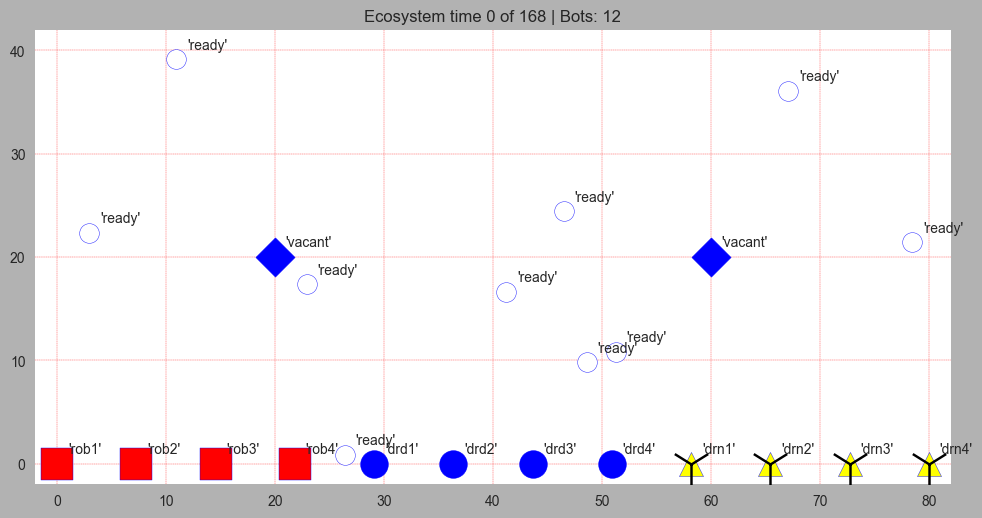


Last Run at:  05/05/2025 00:03:57


In [ ]:
#@title test ecosystem

# test #########################################################################
# Run everything before this code cell, and then run this code cell to test your
# the environment is working

es = ecofactory( robots = 4, drones = 4, droids = 4, arrange = "hor", pizzas = 10, chargers = ([20,20], [60, 20]))

es.display(show = 1)
print ("\nLast Run at: ",now())


In [ ]:
#@title Run Before Point
'''
Make sure the code runs to here. and you can see a test ecosystem above.

 if it does not, fix it.

 The most common reason is poor indentation in the Doc String exercise in part 2.
 '''

'\nMake sure the code runs to here. and you can see a test ecosystem above.\n\n if it does not, fix it.\n\n The most common reason is poor indentation in the Doc String exercise in part 2.\n '

# **Task 1: Version Control**
This section is worth 15 marks. The learning objectives are to:
* Provide you with a deep understanding of version control.
* Learn specifically the use of Github and its integration with coding environments such as VSC or Colab
* Develop transferable skills for future coding projects


This task provides hands-on exercises to help students understand and troubleshoot common issues when working with GitHub, Google Colab, Codespaces, and Git branches. You will explore branch management rules in Git and learn how to resolve issues when deleting branches.


Below you will see details of how to set up your account and four distinct elements to this exercise which also provide you with an assessment rubric.

Please note that your Github repository should include this Jupyter notebook and any arduino code, if applicable.

#### **GitHub Account**

Using your **own** login credentials create a Github account. _**We advise you not to use you university password for other third party sites**_

Create a **private** repository for your coursework project.

Upload your Jupyter Notebook Coursework file(s) and create a `README.md` file to document your work. The README file **should** include:

*   Your student ID
*   A brief explanation of your project (your own style, if you have no idea, a report format would be acceptable)
*   A description of the solution for each task (your own style)
*   A list of the files in the repository and their purpose (your own style)

**The format and details in the `README.md` file contribute to your coursework marks.**

 Share the repository with the instructor by **adding their university email as a collaborator**, rather than sharing your repository link via email directly.

Python Coursework

Add Philip (p.a.leicester@lboro.ac.uk) as a collaborator

Arduino Coursework

Add Wenheng (w.zhang2@lboro.ac.uk) as a collaborator

Change the name of the shared repository as `Your_Student_ID_WSA024_Arduino/Python Coursework`. Note we will usually only check in on your Github at the end of the coursework.


#### **Github Best Practice**

You must research the use of Github for your project. For example you can

* Use it merely as a cloud storage
* Manage versions of your code save as new files
* Use Git to manage code updates/modification in the same file allowing comparisons and code commits
* manage branching and merging
* Learn how to integrate it with your coding environment with Github desktop/website.
* Create and manage related documentation such as release notes.

*italicized text*
Read about it

Play with it!

Use it!!!

See the free [e-book](https://git-scm.com/book/en/v2)


### **Task 1.1: Authentication Issues in Google Colab [4 marks]**

In this task, you will explore authentication issues that arise when saving a Jupyter Notebook from Google Colab to a private GitHub repository.

Open [Google Colab](https://colab.research.google.com), upload your Jupyter Notebook coursework file. Click File > Save a copy in GitHub. Select your private repository as the destination. Ensure that the notebook is correctly saved in the GitHub repository. Based on your experience, fix the problem below.

Considering a scenario that a student opens Google Colab and creates a new Jupyter Notebook. They try to save the notebook directly to GitHub but **cannot find their private repository**, only public repositories appear. What is the reason for this issue? How does Google Colab access repositories? What steps are needed to allow Google Colab to save notebooks to your private repositories? How can you verify that your authentication settings are working correctly? *Do not using CodeSpaces to solve this question.*

**The issue occurs due to authentication problems as Colab uses OAuth, and it may only have access to public repositories unless specified, if the student doesnt grant access to these private repos it cannot be accessed. to fix this one should revoke colab access in github and reautharize it making sure to allow private repositories, they can verify this by checking the box indicating private repository access when opening or saving a file from github in colab.**


### **Task 1.2: Designing a GitHub Action for Automated Task Tracking [3 marks]**

In this task, you will design a GitHub Action workflow that automatically verifies whether you complete the required Git tasks in Task 1.3 and Task 1.4 later. Instead of simply following a guide below, think critically about **what GitHub Actions should check** and **why this automation is useful**.


**Step-by-Step Implementation Order**

To begin, go to your GitHub repository. Create a directory for GitHub Actions (if it doesn't exist).

To create a .github/workflows/ directory within their repository, in CodeSpaces using the command `mkdir -p .github/workflows`.

Once the directory is set up, they need to create a new workflow file inside the `.github/workflows` using `touch .github/workflows/task_verification.yml`.

This file will contain the workflow logic that automates the verification process.

The next step is defining the workflow steps. Open the file `task_verification.yml` and paste the following YAML code.


```yaml
name: Verify Git Tasks

on:
  push:
    branches:
      - main
  pull_request:
    branches:
      - main

jobs:
  check-tasks:
    runs-on: ubuntu-latest
    steps:
      - name: Checkout Repository
        uses: actions/checkout@v3

      - name: Verify Task 1.3 (Branch Deletion)
        run: |
          if git branch -r | grep "origin/test-branch"; then
            echo "❌ Task 1.3: Test branch still exists. Please delete it."
            exit 1
          else
            echo "✅ Task 1.3: Test branch deleted successfully!"
          fi

      - name: Verify Task 1.4 (Merge Conflict Resolution)
        run: |
          if git log --oneline | grep "Resolved merge conflict in project-notes.md"; then
            echo "✅ Task 1.4: Merge conflict resolved successfully!"
          else
            echo "❌ Task 1.4: No merge conflict resolution detected!"
            exit 1
          fi

```


In above GitHub Actions workflow code, students should think critically about how the workflow will determine whether `test-branch` was deleted and how it will confirm the successful resolution of a merge conflict. The workflow should be designed to trigger automatically on `push` and `pull_request` events, ensuring that it runs every time a student pushes changes to the repository.

After writing the workflow, the students need to commit and push it to GitHub using the following commands in Codespaces:

```bash
git add .github/workflows/task_verification.yml
git commit -m "Added GitHub Actions workflow for task verification"
git push origin main
```


Now, your GitHub Actions workflow is in place and ready to track progress.
In task 1.3 and 1.4, students should think critically about how the workflow will determine whether `test-branch` was deleted and how it will confirm the successful resolution of a merge conflict. The workflow should be designed to trigger automatically on `push` and `pull_request` events, ensuring that it runs every time a student pushes changes to the repository.

### **Task 1.3: Unable to Delete a Branch [3 marks]**

This task will help you understand why Git sometimes prevents you from deleting a branch. Now that the workflow built in 1.2 exists, students should attempt to delete a branch and GitHub Actions will check their progress.

Following below steps, using CodeSpaces to create a new branch and delete it. In your GitHub, open **GitHub Codespaces** and navigate to your repository, create a new branch called `test-branch`, using
 ```bash
   git checkout -b test-branch
```
Immediately try to delete it using
```bash
   git branch -d test-branch
   ```
Git will return an error message. What does this message mean? Think about why Git prevents you from deleting the branch. Think about how to properly delete a branch using CodeSpaces and apply the fix. Explain your solutions.

**When trying to delete i get the error:**
error: cannot delete branch 'test-branch' used by worktree at '/workspaces/Drone_delivery_optimisation

**this happens because i was currently on the 'test branch'. git prevents me from deleting the branch im currently on.
To fix it i just need to switch to main again using 'git checkout main', and then i can delete it using 'git branch -d test-branch'.**

### **Task 1.4: Handling a Merge Conflict in Git [5 marks]**

This task will guide you through intentionally creating a merge conflict in Git, analyzing the issue, and resolving it. By the end of this exercise, you will understand what causes a merge conflict, how to identify and analyze it, and how to resolve it efficiently in a collaborative version control workflow. **Instead of** modifying `README.md`, you will create a new markdown file to avoid interfering with important repository documentation.


Start by opening GitHub Codespaces and navigating to your repository. Create a new branch by running `git checkout -b feature-branch`. Create a new markdown file named `project-notes.md` by running `echo "Initial notes for the project." > project-notes.md`. Open the file in a text editor and modify its content by adding the line `"This is an update from feature-branch."`, then save the file. Stage and commit the change using `git add project-notes.md` and `git commit -m "Updated project-notes.md from feature-branch"`. Push this branch to GitHub with git push origin feature-branch.

Now, switch back to the main branch using `git checkout main` and create a markdown file named `project-notes.md` in the main branch. Modify the file by adding the line `"This is an update from main."` and save the file. Commit the change using `git add project-notes.md` and `git commit -m "Updated project-notes.md from main"`, then push the changes with `git push origin main`. At this point, you have two separate changes in the same file, one in main and one in feature-branch.

Attempt to merge feature-branch into main by running `git merge feature-branch`. Git will reject the merge and display an error indicating a merge conflict in project-notes.md. This occurs because the same file was modified differently in both branches, and Git does not know which version to keep.

Think about how to solve the conflict using CodeSpaces, provide your git code
of solving the conflict. After solve this conflict, commit message in CodeSpaces that says `"Resolved merge conflict in project-notes.md"`, and this action will be checked by the GitHub Actions in Task 1.2.

 What caused the merge conflict in this scenario? Why does Git prevent automatic merging when conflicts occur? How can you prevent merge conflicts when working in a team environment? What steps can you take to check for conflicts before merging changes? What are the consequences of forcing a push without resolving a merge conflict?


 what caused the merge conflict:

since a file with the same title "project-notes.md" have been produced and editied with contents in two different branches, git doesnt know where or how to save both in this circumstance so it presents an error.

why does Git prevent automatic merge:

Git always requires human input when saving differing changes to the same file because it may accidently delete important data or code, or introduce bugs.

How to prevent merge conflicts:

    communicate with your team to know which files are anyone working on

    pull changes frequently to stay upto date with everyones work

    Use shortlived branches for minor fixes to minimise overlap

    Try not to edit the same file at once

    make sure there arent any overlapping code before committing to main

what steps can to take to check for conflicts:

compare branches by using the codes git fetch origin git diff main..your-branch

simulate a merge locally git checkout main git merge your-branch

check file history git log -- project-notes.md

what are the consequences of pushing:

    overwriting teams work

    deleting code

    introducing bugs and breaking codespace

    confusing history

    bad collaboration


 Once the workflow in Task 1.2 runs, the students should navigate to the Actions tab in GitHub to review the logs and verify if their implementation correctly tracks branch deletions and merge conflict resolutions in Task 1.3 and 1.4.

1. Go to the GitHub repository.
2. Click on the "Actions" tab (at the top of the repo).
3. Look for the workflow named "Verify Git Tasks".
4. Click on the latest run.
5. Expand the logs for each step to see if the you deleted the test-branch or resolved the merge conflict.

If everything was done correctly, you will see:
*   ✅ Task 1.3: Test branch deleted successfully!

*   ✅ Task 1.4: Merge conflict resolved successfully!


# **Task 2. Bot Class Documentation**

This section is worth 25 marks. You are required to document, using python docstrings, the public interface of the Bot parent (base) class above and these methods:
* constructor
* charge
* display
* _register
* move
* deliver
* _workflow

and this property:
* target_destination:

To research docstrings take a look at:

* [Documenting Your Python Code Base Using Docstrings (Real Python)](https://realpython.com/documenting-python-code/#documenting-your-python-code-base-using-docstrings)

* [PEP 257 – Docstring Conventions](https://peps.python.org/pep-0257/#multi-line-docstrings)

The official docstrings specification, and you can also [read](https://stackoverflow.com/questions/10017776/where-can-i-find-proper-examples-of-the-pep-257-docstring-conventions) that many programmers do not adhere to the convention.



## **Assessment Task**

To attract high marks for this task your docstrings should encompass the following:

For the main Bot (parent or base) class:
* Clear summary line detailing the purpose/use of the class
* Sumary of the methods

Public Methods in the Bot Class
* Summary line detailing the purpose of the method
* Arguments the method requires with default values
* Further description explaining the method as appropriate.


### **Method**

Enter the docstrings for the bot classes in the relavant section 'Bot Classes' **above** in the Bots section (below the ecosystem class).

**Do not make a copy of the classes to write your doc strings, modify the above Bot Class!**

To help, the Bot class has empty docstrings with this line which you can replace with your docstring:

    '''
    part 2 - ENTER DOC STRING HERE BUT DELETE THIS LINE!
    '''

Make sure your doc strings do not break your code by poor or wrong indentation of the starting and ending single or double quotes. Fix it if it breaks your code!


In [ ]:
#@title Test docstrings

# THIS CELL IS FOR TESTING YOUR DOC STRINGS ONLY

# Use this code cell to test your docstrings
# Do not write ANY code in this cell.
# You docstrings are entered on the Bot Class above

docstrings = {}

#Add the docstring for the class'
docstrings[Bot.__name__] = Bot.__doc__
for method in [getattr(Bot, method_name) for method_name in dir(Bot) if (method_name[0:2] != "__" or method_name == "__init__") and callable(getattr(Bot, method_name)) and getattr(Bot,method_name).__qualname__.split('.')[0] == Bot.__name__ ]:
  docstrings[Bot.__name__ + "." + method.__name__ ] = method.__doc__

docstrings["Bot.target_destination (property)"] = Bot.target_destination.__doc__

for method_name, doc_string in docstrings.items():
  print (method_name)
  print (doc_string)
  print ("\n")





Bot

  This bot class represent the robot that will be simulated in the ecosystem, which will have sub-types of robots including
  drones and wheeled robots.

  They are managed by common attributes such as location and state of charge, delivery tasks, movement parameters,
  and graphical display setting for simulations

  Class attributes:
    counter (dict): tracks the number of instances per bot subclass.
    ecosystem (object): which ecosystem the bot belongs.

  Instance attributes (selected):
    kind (str): Type of bot (class name)
    name (str): unique identifier
    cordinates (tuples): current (x,y) position of the bot
    status (str): bot status (on/off)
    activity (str): current activity (idle,moving)
    age (int): Time since start
    soc (int): state of charge
    cargo (list): items the bot is carrying
    contracts (list): delivery contracts assigned
    speed (float): movement speed
    max_payload (float): maximum load (kg)
    destination (tuple): target cordina

## **Marking Criteria**

There are 25/100 marks for this assessment section. You submission will be awarded a discriptor category according to the following criteria.

|Descriptor|Description|
|---|---|
Unacceptable | docstrings inappropriately brief or contain too many errors, misinterpretation of the code.
Weak | docstrings brief and have a few errors or demonstrate lack of understanding of the purpose of the code
Reasonable | Classes documented in addition to public facing methods and properties explained
Good | As reasonable but demonstrates understanding of the classes and methods. Arguments clearly delineated
Excellent | As good showing strong understanding and usage nuances with example.
Outstanding | As excellent but implements a strong adherance to docstring standards throughout.

Students should note it is possible to achieve excellent (first class) without a thorough adherance to the docstring standard which should be seen as extension designed to stretch those who want to strive for a mark in the upper 80s or higher.

# **Task 3. Data Analytics**

Industry 4 is predicated on big data and commensurately much more data analysis and data visualisation is required. Part 3 is about extracting metrics from your ecosystem of bots and tabulating, or displaying the data in a meaningful ways.

##**Introduction**

There are several read-only data points which each bot collects as it goes about its daily business. These are aggregated (summed) each time an ecosystem update method is executed. Thus, their values, at the end of an ecosystem experiment of a specific duration, can be analysed, comparisons made, and conclusions drawn. Key metrics are:


| Metric     | Description                                                       |
|:-----------|:------------------------------------------------------------------|
| distance   | Total distance travelled by the bot in ecosystem coordinate units |
| energy     | Total energy consumed by the bot deemed to be in kilowatt-hours |
| age        | The age of the bot at the end of the experiment                  |
| active hours | Total number of active hours of the bot                           |
| weight delivered | Total weight of deliveries made                                   |
| units delivered | Number of discrete units (pizzas) delivered                       |

At the end of an ecosystem robot delivery operation, you can extract these values from the registry.

**Normalised Metrics**

In order to make comparisons we can divide metrics by time or energy to get _normalised_ metrics which are more useful for comparisons as follows:

| Metric           |         Ratio         | Description                                        |
|:-----------------|:---------------------:|:---------------------------------------------------|
| average speed    | $\dfrac{distance}{active\ hours}$         | units.hour$^{-1}$                                  |
| weight delivery rate    | $\dfrac{weight\ delivered}{active\ hours}$           | kg.hour$^{-1}$ (kg delivered per hour)            |
| unit delivery rate    | $\dfrac{units\ delivered}{active\ hours}$        | units.hour$^{-1}$ (items delivered per hour)            |
| average Power    | $\dfrac{energy}{active\ hours}$          | kWh.hour$^{-1} = kW$                               |
| weight energy efficiency| $\dfrac{energy}{weight\ delivered}$                  | kWh.kg$^{-1}$ (energy used per kg delivered)      |
| unit energy efficiency| $\dfrac{energy}{units\ delivered}$                  | kWh.unit$^{-1}$ (energy used per unit delivered)      |




In terms of making comparison between bots the following **key performance indicators (KPIs)** should be a key focus of attention.

###**KPIs**
* $weight\ delivery\ rate$ - reflects the earning power of the bot
* $unit\ delivery\ rate$ - also reflects earning power, with optimised payloads
* $weight\ energy\ efficiency$ - reflects potential outgoings if we knew the cost of energy
* $unit\ energy\ efficiency$ - also reflects potential outgoings if we knew the cost of energy
* $average\ power$ - power informs our carbon emission rate

In data analytics of engineering simulations we have to be mindful of getting a representative sample. This is particulary important because there is an element of stochastic behaviour due to the randomised location and delivery coordinates of pizzas. Furthermore:

* we have three different bot kinds with differing performance.
* Not all bots of the same kind return the same result. This means the data for our KPIs should be averaged over several bots of the same kind.
* Enough bots of each type should be included in the analysis in order to get statistically significant results
* The ecosystem duration should be long enough to lessen the variance of each bot kind's results.

##**Assessment Task**

The **aim** is to produce a meaningful tabular and graphical analysis of bot performance using the KPIs.

The following are **objectives**:
1. Generate data for each KPI for the comparison of each kind of bot
2. Ensure the data are statistically representative by studying at least 5 bots of each kind for an operational duration of one ecosystem year.
3. Produce the data in a form which can be displayed using matplotlip using good engineering standard charts
4. Evaluate your output to make a comparison between the bot kinds.


###**Method**

Use the ```Ecosystem Operation``` code below - this is a copy of the fully functional ecosystem in the training edition.

The aggregated data required for the KPIs is stored in bot attributes, and in the ecosystem registry. You are required to use the **ecosystem registry** as the primary data source.

Whilst you may develop your analysis and graphical outputs as top level procedural code your final submitted solution should be wrapped in a function called ```ecosystem_analytics```. This should receive one argument, namely the ecosystem which has been used to run the robot ecosystem i.e. the function definition looks like:

 ```
def ecosystem_analytics (es):
  """
  es (Ecosystem): An instance of the Ecosystem class to be analyzed.
  """
 ```
A _stub_ for this function has been included below.

As intimated in the code stub, your function **MUST** include a doc string to explain to the assessor what your function does or marks will be deducted. This has been added below but you should add to this where indicated.

When your function is called it should perform the following:

Data Analytics
* extract the relevant data for calculating the KPIs.
* Calculate the KPIs for each bot
* Calaculate the average for each KPI for each bot kind

You can show tabulations of this data.

Data Visualisation - Your function can produce representative graphs for:
  * Average comparative KPIs for each kind of bot
  * Standard deviations for KPIs for each kind of bot
  * all the bots in the dataset
  * well formatted tabular data [stretch target]
  * data tabulation showing absolute values for energy, number and weight of pizzas delivered, distance covered, etc i.e. not just the time normalised KPIs [stretch target]

## **Marking Criteria**

There are 25/100 marks for this assessment section. You submission will be awarded a discriptor category according to the following criteria.

|Descriptor|Description|
|---|---|
Unacceptable | ecosystem_analytics function does not work or produces no meaninful charts and tabulations
Weak | only 2 or less KPIs have been analysed and charted for each bot kind, or only one bot kind examined or data incorrectly extracted and analysed
Reasonable | All KPIs for all bots correctly charted
Good | As reasonable but due care given to quality of charts, with clear labeling of axis, categories and titles.
Excellent | As good with thought given to use of matplot lib for displaying comparative and related charts in a multiple plot
Outstanding | As excellent with additional analysis and presentation of tabular and absolute data values.

Students should note it is possible to achieve excellent (first class) without doing the stretch targets which should be seen as extension elements designed to stretch those with strong programming skills and those who want to strive for a mark in the high 80s or higher.

## **Ecosystem Analytics**

The code cell below forms your submission for this assessment. As directed above use this cell to perform your analysis of the registry and render graphical and/or tabular outputs You must deliver a working cell to receive a mark for this section.

Your final code cell for this cell must have the title:

```#@title Ecosystem Analytics Assessment Function [submission]```

Make sure you describe your achievements in the docstring where indicated.

## **Ecosystem Operation**

The code cell below is a copy of the one used in the training edition with the  the text (comment) outputs removed.

This cell is **not** assessed. You must use this to deliver an ecosystem to your data analytics function above.

You can remove any print outputs for this cell which may interfere with your function outputs.

Note this ecosystem operation provides a 'baseline' performance of your robots prior to section 4 enhancements.





Graphical Visualisation Of Each Bots KPIs




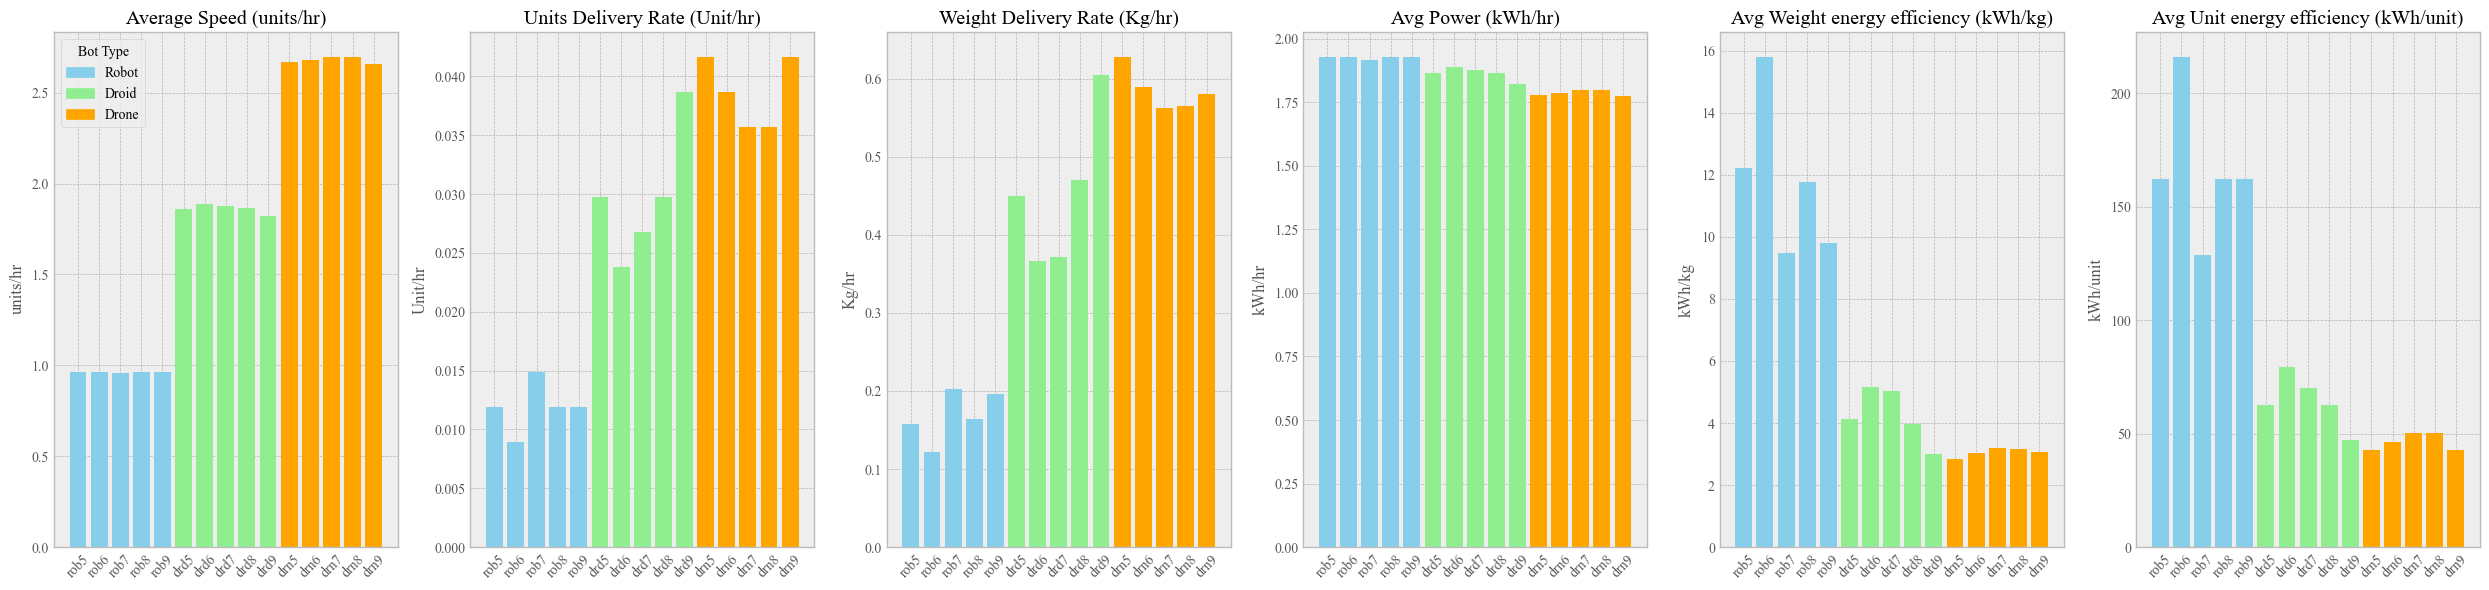



Tabular Visualisation Of Each Bots KPIs


Bot Name  Speed (units/hr)  Units Delivered (unit/hr)  Weight Delivered (kg/hr)  Power (kWh/hr)  Weight Energy Efficiency (kWh/kg)  Unit Energy Efficiency (kWh/unit)
    rob5          0.964286                   0.011905                  0.157738        1.928571                          12.226415                         162.000000
    rob6          0.964286                   0.008929                  0.122024        1.928571                          15.804878                         216.000000
    rob7          0.957054                   0.014881                  0.202381        1.916667                           9.470588                         128.800000
    rob8          0.964315                   0.011905                  0.163690        1.928571                          11.781818                         162.000000
    rob9          0.964286                   0.011905                  0.196429        1.928571                           9.81

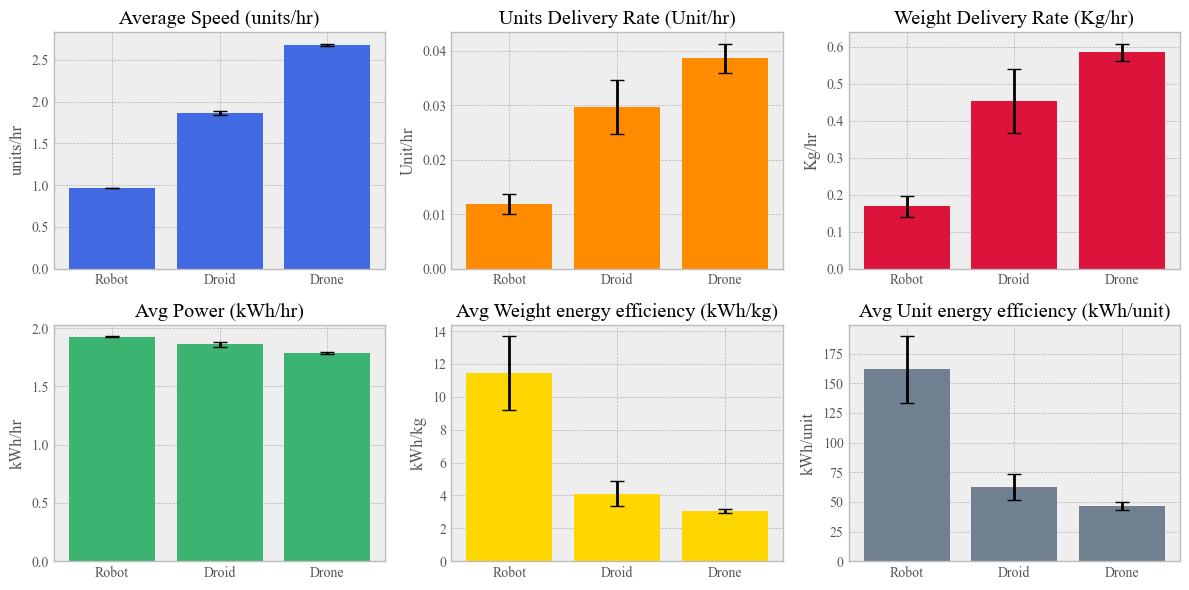



Tabular Visualisation Of Each Bot Types KPIs


Bot Type  Speed (units/hr)  Speed Standard Deviation  Units Delivered (unit/hr)  Units Standard Deviation  Weight Delivered (kg/hr)  Weight Standard Deviation  Power (kWh/hr)  Power Standard Deviation  Weight Energy Efficiency (kWh/kg)  W EFF Standard Deviation  Unit Energy Efficiency (kWh/unit)  U EFF Standard Deviation
   Robot          0.962845                  0.002896                   0.011905                  0.001882                  0.168452                   0.029075        1.926190                  0.004762                          11.434629                  2.261544                         161.800000                 28.041797
   Droid          1.861625                  0.022075                   0.029762                  0.004980                  0.452381                   0.086340        1.861905                  0.022080                           4.115789                  0.782413                          62.560000         

In [ ]:
################################################################################
#@title Ecosystem Analytics Assessment Function [submission]
# Only this cell will be assessed for part 3
# NOTE - Only this code cell and outputs will be assessed for for section 3. Any
# code you produce must be in this cell otherwise the assessment scripts might
# not be able to evaluate your code. Therefore, if you write support functions
# for your ecosystem_analytics function make sure that you include all required
# code in this code cell.
# do not edit or write above this line #########################################
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def ecosystem_analytics(es):
  """
  Perform analytics on an Ecosystem instance.

  This function takes an instance of the Ecosystem class and analyzes its
  registry property to provide graphical and tabular outputs depicting the
  ecosystem's performance.

  Parameters:
      es (Ecosystem): An instance of the Ecosystem class to be analyzed.

  Returns:
      None

  Notes:
      - The analyzed results are displayed through graphical and tabular outputs.
      - The 'registry' property of the provided Ecosystem instance is used as the
        basis for analysis.
      - The anlysis that have been included are:

      COMPLETE THIS SECTION TO EXPLAIN WHAT YOU HAVE ACHEIVED (REMOVING THIS LINE)
  """


  # Graphical and tabular outputs go here. Make sure you include any required imports in
  # this code cell. Otherwise your code will not work in the assessment tools.

  # The ecosystem tabulation is used here. You can improve on this, use a library
  # harness the power of pandas if you wish


  ### INITILISATION ###
  bots = es.bots()

  groups = defaultdict(list)

  ### CUNSTOMISATION ###
  plt.style.use('bmh')
  plt.rcParams['font.family'] = 'times new roman'
  colors = plt.cm.Set2.colors
  legend_handles = [
    mpatches.Patch(color='skyblue', label='Robot'),
    mpatches.Patch(color='lightgreen', label='Droid'),
    mpatches.Patch(color='orange', label='Drone')
  ]



  ############## PER BOT DATA ###############

  print("\n")
  print("Graphical Visualisation Of Each Bots KPIs")
  print("\n")

  bot_names = []
  per_bot_speed = []
  per_bot_units = []
  per_bot_weight = []
  per_bot_power = []
  per_bot_w_eff = []
  per_bot_e_eff = []

  for bot in bots:
    bot_names.append(bot.name)
    per_bot_speed.append(bot.distance /336)
    per_bot_units.append(bot.units_delivered /336)
    per_bot_weight.append(bot.weight_delivered /336)
    per_bot_power.append(bot.energy / 336)
    per_bot_w_eff.append(bot.energy / bot.weight_delivered)
    per_bot_e_eff.append(bot.energy / bot.units_delivered)

  plt.figure(figsize=(25, 6))
  colors = ['skyblue'] * 5 + ['lightgreen'] * 5 + ['orange'] * 5

  ########## GRAPHICAL OUTPUT OF EACH BOT ##############

  # Speed
  plt.subplot(1, 6, 1)
  plt.bar(bot_names, per_bot_speed, color=colors)
  plt.title("Average Speed (units/hr)")
  plt.ylabel("units/hr")
  plt.xticks(rotation=45)
  plt.legend(handles=legend_handles, title="Bot Type")

  # Units Delivered
  plt.subplot(1, 6, 2)
  plt.bar(bot_names, per_bot_units, color=colors)
  plt.title("Units Delivery Rate (Unit/hr)")
  plt.ylabel("Unit/hr")
  plt.xticks(rotation=45)

  # Weight Delivered
  plt.subplot(1, 6, 3)
  plt.bar(bot_names, per_bot_weight, color=colors)
  plt.title("Weight Delivery Rate (Kg/hr)")
  plt.ylabel("Kg/hr")
  plt.xticks(rotation=45)

  # Power
  plt.subplot(1, 6, 4)
  plt.bar(bot_names, per_bot_power, color=colors)
  plt.title("Avg Power (kWh/hr)")
  plt.ylabel("kWh/hr")
  plt.xticks(rotation=45)

  # Average weight energy efficiency
  plt.subplot(1, 6, 5)
  plt.bar(bot_names, per_bot_w_eff, color=colors)
  plt.title("Avg Weight energy efficiency (kWh/kg)")
  plt.ylabel("kWh/kg")
  plt.xticks(rotation=45)

  # Average unit energy efficency
  plt.subplot(1, 6, 6)
  plt.bar(bot_names, per_bot_e_eff, color=colors)
  plt.title("Avg Unit energy efficiency (kWh/unit)")
  plt.ylabel("kWh/unit")
  plt.xticks(rotation=45)

  plt.tight_layout()
  plt.show()

  ######## TABULAR OUTPUT OF EACH BOT ##########
  print("\n")
  print("Tabular Visualisation Of Each Bots KPIs")
  print("\n")

  data = {
    'Bot Name': bot_names,
    'Speed (units/hr)': per_bot_speed,
    'Units Delivered (unit/hr)': per_bot_units,
    'Weight Delivered (kg/hr)': per_bot_weight,
    'Power (kWh/hr)': per_bot_power,
    'Weight Energy Efficiency (kWh/kg)': per_bot_w_eff,
    'Unit Energy Efficiency (kWh/unit)': per_bot_e_eff
  }

  df = pd.DataFrame(data)
  print(df.to_string(index=False))

  ##########################################

  ########### BOT DATA BY KIND ##############
  print("\n")
  print("Graphical Visualisation Of Each Bot Types KPIs")
  print("\n")

  for bot in bots:
      if isinstance(bot, Bot):  # optional check
          kind = ''.join([c for c in bot.name if c.isalpha()])
          groups[kind].append(bot)

  # Step 1: Collect data
  kinds = ['Robot','Droid','Drone']
  avg_speed = []
  avg_units = []
  avg_weight = []
  avg_power = []
  weight_energy_eff = []
  unit_energy_eff = []
  std_avg_speed = []
  std_avg_units = []
  std_avg_weight = []
  std_avg_power = []
  std_weight_energy_eff = []
  std_unit_energy_eff = []

  # Now compute averages per kind
  for kind, bot_list in groups.items():
    n = len(bot_list)
    if n == 0:
        continue

    total_distance = sum(bot.distance for bot in bot_list)
    total_energy = sum(bot.energy for bot in bot_list)
    total_units = sum(bot.units_delivered for bot in bot_list)
    total_weight = sum(bot.weight_delivered for bot in bot_list)
    total_soc = sum(bot.soc for bot in bot_list)

    #active hours always = 336

    avg_speed.append((total_distance/5) / 336)                # average speed per bot
    avg_units.append((total_units/5) / 336)                   # average units delivered per bot for each hour
    avg_weight.append((total_weight/5) / 336)                 # average weight delivered per bot for each hour
    avg_power.append((total_energy/5) / 336)                  # average power expended per bot for each hour
    weight_energy_eff.append(total_energy / total_weight)     # average weight energy effiency for each bot
    unit_energy_eff.append(total_energy / total_units)        # average unit energy efficiency for each bot


    std_avg_speed.append(np.std([(bot.distance/336) for bot in bot_list]))
    std_avg_units.append(np.std([(bot.units_delivered/336) for bot in bot_list]))
    std_avg_weight.append(np.std([(bot.weight_delivered/336) for bot in bot_list]))
    std_avg_power.append(np.std([(bot.energy/336) for bot in bot_list]))
    std_weight_energy_eff.append(np.std([bot.energy / bot.weight_delivered for bot in bot_list]))
    std_unit_energy_eff.append(np.std([bot.energy / bot.units_delivered for bot in bot_list]))

  ######## GRAPHICAL OUTPUT OF EACH BOT KIND ###########

  plt.figure(figsize=(12, 6))

  # Speed
  plt.subplot(2, 3, 1)
  plt.bar(kinds, avg_speed, yerr=std_avg_speed, capsize=5, color='royalblue')
  plt.title("Average Speed (units/hr)")
  plt.ylabel("units/hr")

  # Units Delivered
  plt.subplot(2, 3, 2)
  plt.bar(kinds, avg_units, yerr=std_avg_units, capsize=5, color='darkorange')
  plt.title("Units Delivery Rate (Unit/hr)")
  plt.ylabel("Unit/hr")

  # Weight Delivered
  plt.subplot(2, 3, 3)
  plt.bar(kinds, avg_weight, yerr=std_avg_weight, capsize=5, color='crimson')
  plt.title("Weight Delivery Rate (Kg/hr)")
  plt.ylabel("Kg/hr")

  # Power
  plt.subplot(2, 3, 4)
  plt.bar(kinds, avg_power, yerr=std_avg_power, capsize=5, color='mediumseagreen')
  plt.title("Avg Power (kWh/hr)")
  plt.ylabel("kWh/hr")

  # Average weight energy efficiency
  plt.subplot(2, 3, 5)
  plt.bar(kinds, weight_energy_eff, yerr=std_weight_energy_eff, capsize=5, color='gold')
  plt.title("Avg Weight energy efficiency (kWh/kg)")
  plt.ylabel("kWh/kg")

  # Average unit energy efficency
  plt.subplot(2, 3, 6)
  plt.bar(kinds, unit_energy_eff, yerr=std_unit_energy_eff, capsize=5, color='slategray')
  plt.title("Avg Unit energy efficiency (kWh/unit)")
  plt.ylabel("kWh/unit")

  plt.tight_layout()
  plt.show()

  ######## TABULAR OUTPUT OF EACH BOT KIND ##########
  print("\n")
  print("Tabular Visualisation Of Each Bot Types KPIs")
  print("\n")

  data_kinds = {
    'Bot Type': kinds,
    'Speed (units/hr)': avg_speed,
    'Speed Standard Deviation': std_avg_speed,
    'Units Delivered (unit/hr)': avg_units,
    'Units Standard Deviation': std_avg_units,
    'Weight Delivered (kg/hr)': avg_weight,
    'Weight Standard Deviation': std_avg_weight,
    'Power (kWh/hr)': avg_power,
    'Power Standard Deviation': std_avg_power,
    'Weight Energy Efficiency (kWh/kg)': weight_energy_eff,
    'W EFF Standard Deviation': std_weight_energy_eff,
    'Unit Energy Efficiency (kWh/unit)': unit_energy_eff,
    'U EFF Standard Deviation': std_unit_energy_eff,
  }

  df = pd.DataFrame(data_kinds)
  print(df.to_string(index=False))


  print("\n")

  # Original data for comparison
  data = es.tabulate ('name', 'status', 'soc', 'units_delivered', 'weight_delivered','energy', 'distance', 'damage','age','active', kind_class = 'Bot', title = "Bot Delivery Performance Data")





# Call ecosystem_analytics function and pass the ecosystem instance
ecosystem_analytics(es)







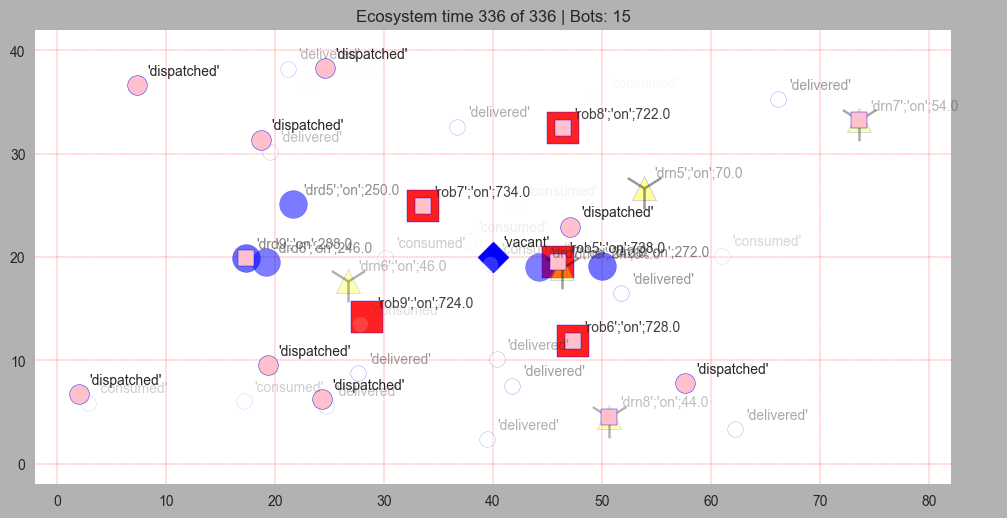

In [ ]:

################################################################################
# @title Ecosystem Operation
# do not write above this line #################################################
#%%script false --no-raise-error

# This is your test ecosystem for the data analytics. It is the same as the final
# training ecosystem

es = ecofactory(robots = 5, droids = 5, drones = 5, chargers = [40,20])
charger = es.chargers()[0]
es.display(show = 1, pause = 50)                                                # show = 0 for maximum speed
es.debug = False                                                                # this will directly display damage and warning messages. Note show needs to be zero  (show = 0)
es.messages_on = False                                                          # over 52 weeks it is wise to turn messages off as there are too many. But when researching turn on for shorter runs
es.duration = "2 week"                                                         # We are aiming to run for a year with minimum or no bot breakages

home = [40,20, 0]                                                               # You must have only this one charger!
charge_threshold = 0.20

while es.active:

  for bot in es.bots():

    create_deliverables(es)                                                     # Use the create deliverables function to maintain a stock of ready pizzas

    if bot.soc / bot.max_soc < charge_threshold and bot.station is None:        # decision to charge when percent soc = 20%. This can be optimised and varied for each kind (see stretch objective)
      bot.charge(charger)                                                       # initiate charging.
    if bot.activity == 'idle':                                                  # if bot is idle, contract to deliver a ready pizza.
      for pizza in es.deliverables():
        if pizza.status == 'ready':
          bot.deliver(pizza)                                                    # ensure we do not contract to deliver a pizza already contracted by another bot
          break
      if not bot.destination and bot.coordinates != home:
        bot.target_destination = home                                           # if we get here, we've gone through the list of pizzas and none was ready
    if bot.target_destination:bot.move()                                        # move whilst we have a destination. At the end of delivery, the bot status will be set to idle

  es.update()                                                                   # update when all bots have been processed and moved





In [ ]:
#@title Test Ecosystem Analytics Function

# Your Ecosystem Analytics Function receives the ecosystem instance 'es' from the
# Ecosystem Operation code cell above to run and display your analysis.
# Run this cell to test your Ecosystem Analytics function.
# This way you do not have to keep running the Ecosystem Operation cell as you
# develop your Ecosystem Analytics

%%script false --no-raise-error
ecosystem_analytics (es)                                                        # pass the ecosystem instance to the analytics function

UsageError: Line magic function `%%script` not found.


# **Task 4. Performance Enhancements**

It should not have escaped your notice, in watching some of the bot activities that some '_decisions_' made by them are probably not the best. Much could be done to improve the performance and yield better KPIs.

In this section you can do some serious programming, either in ecosystem operation code, or directly on the bot classes. Note that you must not change the ecosystem code.

## **Introduction**

Where and how might bot decision making be improved? Much of this centres around pizza allocation and collection, and journeys to the charging station. As a stretch target there is also the contracting with the ecosystem of delivering larger (heavier) pizzas.

###**Pizza Allocation**

Right at the begining of a 'run' you may have 15 idle bots and 15 ready pizzas. The create_deliverables function will create enough ready pizzas in advance, one for each idle bot. Allocation of a pizza to a bot, as currently coded, is done on a first-come-first-serve basis. Thus, a bot may have to travel right across the arena to collect its pizza, when it could have collected a nearer one had a smarter allocation been implemented. How much time and energy, over a year would that save?

The answer is probably not much since, once started, most other bots are busy when a bot becomes idle to deliver its next pizza so only one pizza may be created for the next allocation. However the create_deliverables function has an optional ```advance``` argument (see the docstring for create_deliverables) which will create and maintain a stock of advanced ready pizzas to choose from. If one bot is idle and 15 bots are active, a stock of 16 will be created by setting the ```advance``` argument to 1. 31 will be created by setting it to 2. Thus you raise the probability of there being a nearby pizza at the time of allocation.

In order to implement a solution to smarter allocation therefore, you need to (a) create 'advance' pizzas, and (b) create an alogorithm for allocating the nearest pizza from this pool of advance pizzas.

The second area is charging optimisation. There are three possible areas to develop: decision threshold, charger availability, and opportunistic charging

### **Charging**
&nbsp;&nbsp;**Threshold**

 The decision making for charging is currently fixed at a 20% threshold; for all kinds of bot. This is not necessarily well researched, but simply a heuristic evaluation of when the bots rarely run out of battery and break. Furthermore, bots of different kinds will probably require different thresholds.

&nbsp;&nbsp;**Charger Availability**

Currently there is one centrally located charger. What if there were two or even three or four chargers distributed over the arena and the bot chose the nearest one? We would need to develop an algorythm to choose the nearest charger but once chosen charging would become a quicker turn around and the bot could get on with the delivery job again.

Furthermore, always-closer chargers should significantly lower the charging decision threshold since we can guarantee getting there sooner with a lower required soc. This will reduce charging frequency and thereby further elevate efficiency KPIs.

&nbsp;&nbsp;**Opportunistic Charging**

Why pass close to, or even pass right over a charger when on a delivery journey without stopping to charge? Opportunistic charging could save unnecessary travelling to a charging station.

### **Heavier Pizzas**

Currently the maximum pizza weight is fixed (how?). You can raise this weight and increase the size, and therefore the maximum delivery payload. However you run the risk of allocating pizzas which are too heavy. This causes the ecosystem to reject contracts. Therefore you would need to implement weight control as part of pizza-to-bot allocation.

## **Assessment Task**

The **aim** is to produce performance enhancements as measured by the KPIs in the data analytics section.

The following are your **objectives**:
1. Research and implement the optimum charging threshold for each bot for your charging configuration.
1. Implement two or more, to a maximum of four, charging stations and create decision control to choose the nearest one at the time of charging decision with commensurate adjustment of charging threshold.
1. Implement smart pizza allocation using the ```create_deliverables``` function's ```advance``` argument set to a maximum of 3.

**stretch objectives**:
4. Implement smart opportunistic charging
5. Choose a heavier maximum deliverable weight delivery contract with the ecosystem and implement weight control in delivery allocation

### **Method**

A copy of the ```ecosystem operation``` code cell from section 3 (as originally derived from the ```Sustainable Ecosystem``` training code cell ) has been pasted below, and named ```enhanced ecosystem operation```.

Use this to implement your code to deliver on the objectives above.

Note that the new ```enhanced ecosystem operation``` code cell must call your data analytics function developed in section 3 so that a reader of your Notebook can run your code and make comparisons between the original and enhanced ecosystem.

## **Stretch objectives and optional elements**

Gauge your time and capabilities appropriately. Even without these elements it will be possible to achieve a first class mark.

These additional elements are designed to stretch those with strong programming skils and those who want to strive for a mark in the 90s or higher! They are not trivial.

## **Requirements**

Your ecosystem operation must implement the ecofactory and create a maximum of five bots of each kind and operate for 1 whole year (52 weeks).





















## **Marking Criteria**

There are 25/100 marks for this assessment section. You submission will be awarded a discriptor category according to the following criteria.

|Descriptor|Description|
|---|---|
Unacceptable | No meaningful attempt at performance enhancement has been made or approach is incorrect
Weak | only attempted to adjust the charging threshold for different bot kinds
Reasonable | Charging threshold with charger availability
Good | As reasonable with added implementation of smart pizza allocation implemented.
Excellent | As good with thought given careful, readable code with structured implementation with use of new or available functions for example.
Outstanding | As excellent with additional implemtation of opportunistic charging and/or higher pizza weights.

Students should note it is possible to achieve excellent (first class) without doing the stretch targets which should be seen as extension elements designed to stretch those with strong programming skills and those who want to strive for a mark in the higher 80s or above.

## **Enhanced Ecosystem Operation**

The code cell below forms your submission for this assessment.

Currently the cell has the code used in the data analytics section, and indeed in the training section, which runs the ecosystem for 52 weeks. As per the aim of this section above, you need to modify this code to deliver on the objectives of enhancing the bots performance as measured by the KPIs.

Your final code cell for this cell must have the title:

```# @title Enhanced Ecosystem Operation [submission]```




In [ ]:
################################################################################
# @title Enhanced Ecosystem Operation [submission]

# NOTE - Only this code cell and outputs will be assessed for for section 4. Any
# code you produce, including fucntions or required imports must be in this cell
# otherwise the assessment scripts might not be able to evaluate your code.
# Therefore, if you write support functions for your Enhanced Ecosystem
# Operation make sure that you include all required code in this code cell.

# Tips
# 1. whilst developing you can set the duration much shorter whilst you
# develop your code.
# 2. this section is challenging, but charge thresholds are low hanging fruit!

# do not edit or write above this line #########################################



performance_enhancements = '''
  Part 4 - ENTER INFORMATION HERE, REPLACING THIS LINE TO DOCUMENT YOUR
           PERFORMANCE IMPROVEMENT METHODS

'''


es = ecofactory(robots = 5, droids = 5, drones = 5, chargers = ([40, 20],) )
chargers = es.chargers()                                                        # currently one chargers appear in the middle, but you can create 4!
charger = chargers[0]                                                           # currently using first charger only!
es.display(show = 0, pause = 50)                                                # show = 0 for maximum run speed
es.debug = False                                                                # this will directly display damage and warning messages. Note show needs to be zero  (show = 0)
es.messages_on = False                                                          # over 52 weeks it is wise to turn messages off as there are too many. But when researching turn on for shorter runs
es.duration = "52 week"                                                         # We are aiming to run for a year with minimum or no bot breakages

home = [40,20, 0]
charge_threshold = 0.20

while es.active:

  for bot in es.bots():

    create_deliverables(es)                                                     # Use the create deliverables function to maintain a stock of ready pizzas

    if bot.soc / bot.max_soc < charge_threshold and bot.station is None:        # decision to charge when percent soc = 20%. This can be optimised and varied for each kind (see stretch objective)
      bot.charge(charger)                                                       # initiate charging.
    if bot.activity == 'idle':                                                  # if bot is idle, contract to deliver a ready pizza.
      for pizza in es.deliverables():
        if pizza.status == 'ready':
          bot.deliver(pizza)                                                    # ensure we do not contract to deliver a pizza already contracted by another bot
          break
      if not bot.destination and bot.coordinates != home:
        bot.target_destination = home                                           # if we get here, we've gone through the list of pizzas and none was ready
    if bot.target_destination:bot.move()                                        # move whilst we have a destination. At the end of delivery, the bot status will be set to idle

  es.update()                                                                   # update when all bots have been processed and moved

ecosystem_analytics (es)




[]

# **End of Workbook**

# **<END>**